I'm going to try to use this document to compile, and save, good looking conductance plots from the set of ferromagnetic dot measurements I have. 

Each plot has a data frame saved as a pickle for faster loading in the future.

In [3]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

In [4]:
def get_dIdV(df, dV):
    return pd.DataFrame(np.gradient(df,dV)[0], index = df.index, columns = df.columns)

# SCF72

In [13]:
rt_dir = '/Volumes/JUPITER/Data/SCF72/room_temp/'
cold_dir = '/Volumes/JUPITER/Data/SCF72/4K/'
fig_dir = '/Users/nik/Dropbox/Repos/thesis/figures/fmdots/'

#### Room Temperature

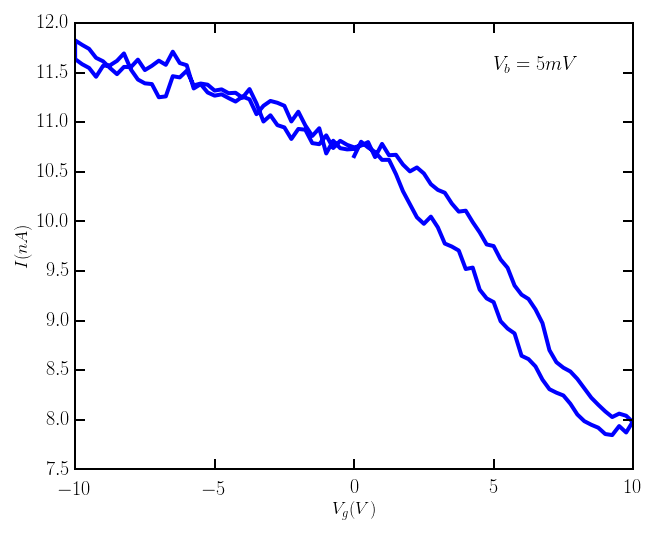

In [14]:
f = os.path.join(rt_dir, 'gate-swp_15-23_13_a.bin')
data = np.fromfile(f, '>d')
data = data.reshape((-1, data[0]))
gate = data[:,1]
current = data [:,2]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gate, current*1e9)
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.text(5.0, 11.5, r'$V_b = 5mV$')

fig.savefig(os.path.join(fig_dir, 'scf72_15-23_gateswp_a_300K.pdf'))

# df = pd.DataFrame({'Gate' : gate, 'Iavg' : current})
#df.to_pickle(os.path.join(new_dir, 'RT_gate-swp_15-23_13_a.pkl'))

#### 4K DATA

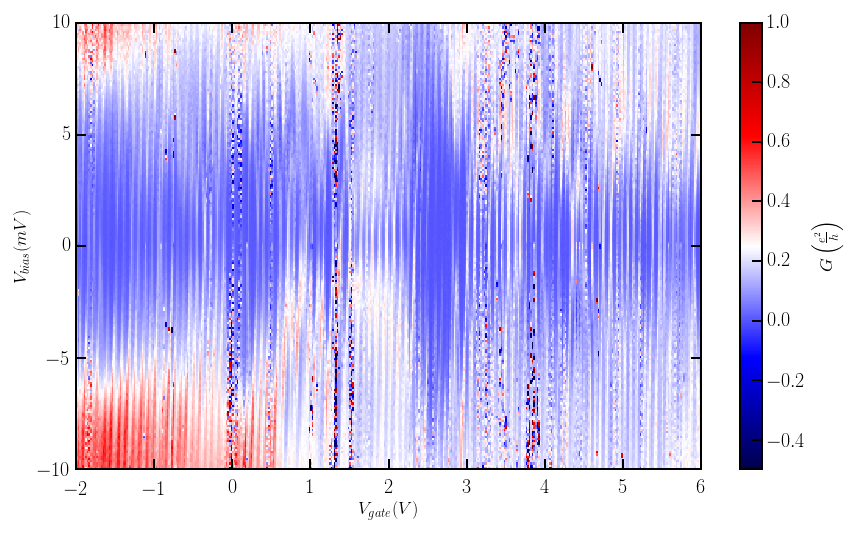

In [38]:
f = os.path.join(cold_dir,'VI-gate_23-21_13_f.bin')

data = np.fromfile(f,'>d')
data = data.reshape((-1, data[0]))
data = data.byteswap().newbyteorder()
data = data.transpose()
df = pd.DataFrame(data[1:, 1:], index=data[1:, 0], columns=data[0, 1:])
df.columns.name = 'gate'
df.index.name = 'bias'
df.index = df.index*1000
df = df.groupby(df.index).mean()
cond = get_dIdV(df, 100e-6)/3.875e-5

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.5, vmax = 1.0, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_{gate} (V)$')
ax.set_ylabel(r'$V_{bias} (mV)$')
ax.set_xlim(-2,6)
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig('/Users/nik/Dropbox/Repos/thesis/figures/fmdots/scf72_23-21_vigate_f_4K.pdf')

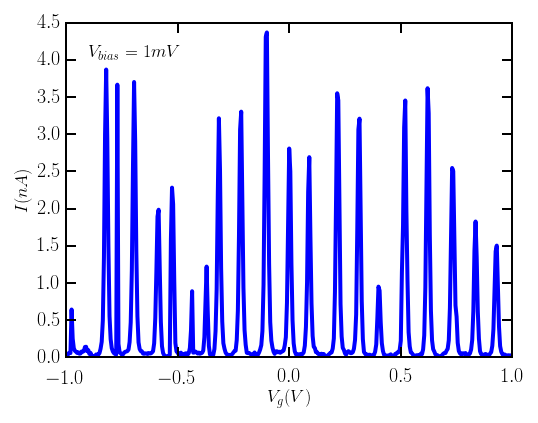

In [39]:
f = os.path.join(cold_dir,'gate-swp_17-29_13_b.bin')
df = lvdt.get_data_2d(f)
df['Iavg'] = df['Iavg']*1e9 + 0.6 # correct offset

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(df.Gate[200:602],df.Iavg[200:602])
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
# ax.set_title('gate-swp_17-29_13_b'+'_one')
ax.text(-0.9,4.0,r'$V_{bias}=1mV$', fontsize=18)

fig.savefig('/Users/nik/Dropbox/Repos/thesis/figures/fmdots/scf72_17-19_gateswp_b1_4K.pdf')

# df_cut = df.iloc[200:602,:]
#df_cut.to_pickle(os.path.join(new_dir, '4K_gate-swp_17-29_13_b1.pkl'))

In [40]:
# get the rest, including TIME SERIES DATA

data = np.fromfile(f,'>d')
data_two = data[4818:]
data_two = data_two.reshape((-1,data_two[0]))
data_two = data_two.byteswap().newbyteorder()
columns = ['Size','Gate','Iavg','Istd','t0','dt']
columns.extend(['I'+str(x) for x in range(int(data_two[0,0]-6))])
df_two = pd.DataFrame(data_two, columns=columns)

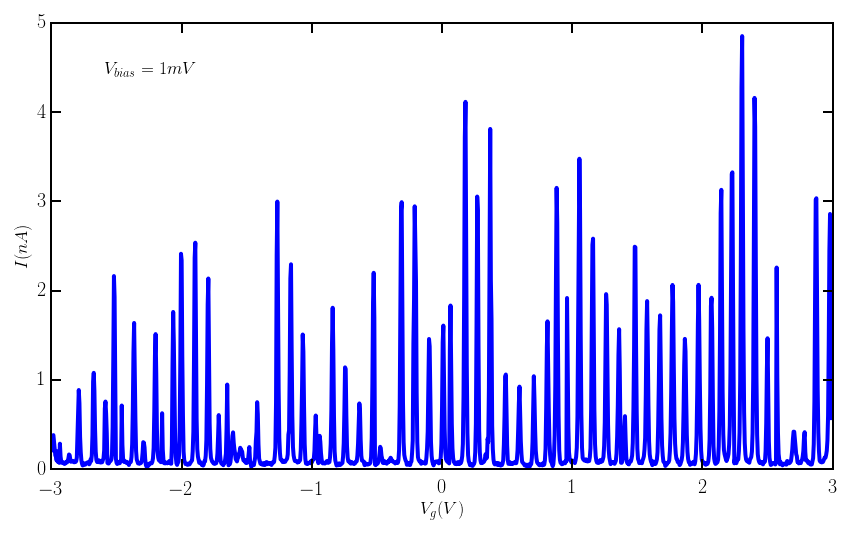

In [42]:
df_two['dir'] = (df_two['Gate']-df_two['Gate'].shift()).fillna(0)
df_plt = df_two[df_two['dir']<0]

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.plot(df_plt['Gate'], df_plt['Iavg']*1e9+0.6)
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.text(-2.6,4.4,r'$V_{bias}=1mV$', fontsize=18)

fig.savefig('/Users/nik/Dropbox/Repos/thesis/figures/fmdots/scf72_17-19_gateswp_b2down_4K.pdf')

#df_two.to_pickle(os.path.join(new_dir, '4K_gate-swp_17-29_13_b1.pk2'))

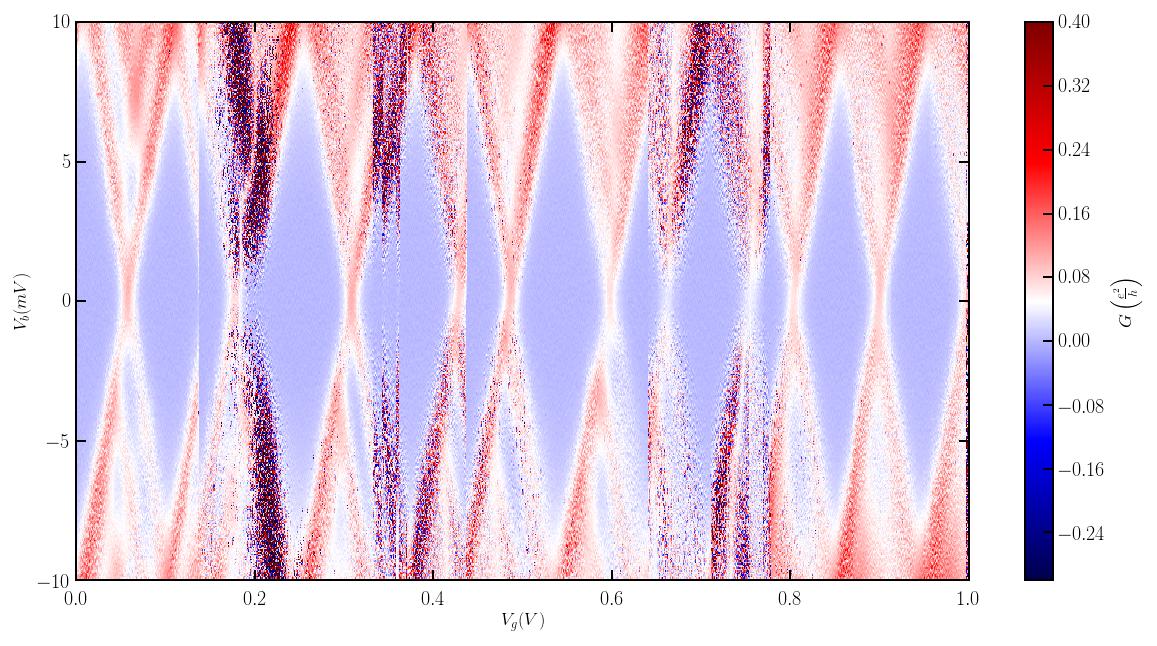

In [53]:
f = os.path.join(cold_dir,'VI-gate_17-19_13_f.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
cond = get_dIdV(df, 50e-6)/3.875e-5

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.3, vmax=0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf72_17-19_vigate_f_4K.pdf'))

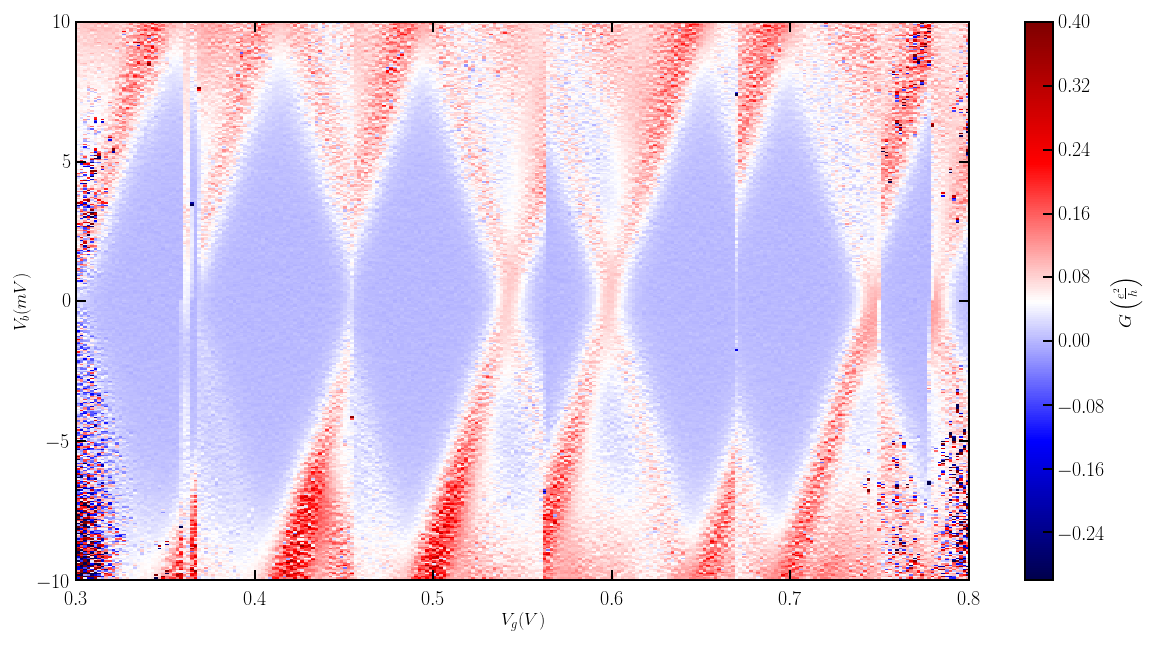

In [55]:
# also contains TIME SERIES DATA

f = os.path.join(cold_dir,'VI-gate_17-19_13_g.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
cond = get_dIdV(df, 50e-6)/3.875e-5

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.3, vmax=0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf72_17-19_vigate_g_4K.pdf'))

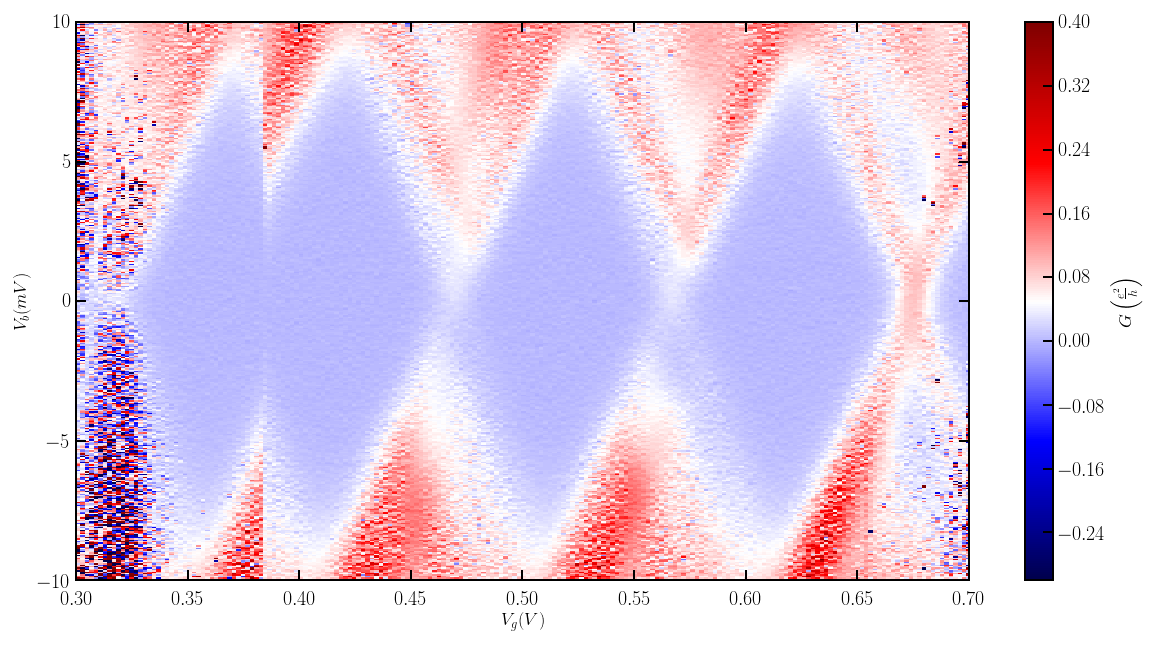

In [59]:
# Same as above two plots but in B field

# also contains TIME SERIES DATA

f = os.path.join(cold_dir,'VI-gate_17-19_13_g_n4T.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
cond = get_dIdV(df, 50e-6)/3.875e-5

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.3, vmax=0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
ax.set_xlim(0.3, 0.7)
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf72_17-19_vigate_g-n4T_4K.pdf'))

In [60]:
def get_bias_gate(header):
    bias = 0.0
    gate = 0.0
    for i,line in enumerate(header):
        if line[0] == 'Bias Output Options':
            bias = float(header[i+5][1])
        if line[0] == 'Gate Output Options':
            gate = float(header[i+5][1])
    return bias, gate

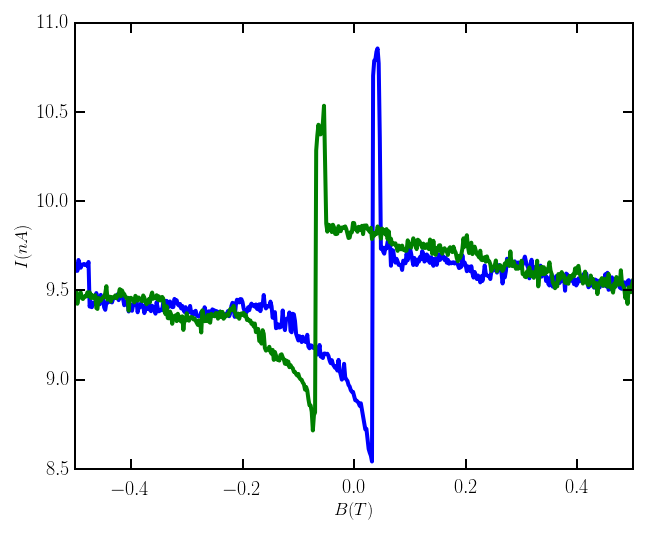

In [74]:
# filelist = ['BI_17-19_13_c.bin', 'BI_17-19_13_d.bin', 'BI_17-19_13_e.bin', 'BI_17-19_13_i.bin']

f = os.path.join(cold_dir, 'BI_17-19_13_e.bin')
bias, gate = get_bias_gate(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
ind = lvdt.split_sweeps(df, 'Field')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df['Field'][0:501], df['Iavg'][0:501]*1e9, label='Up')
ax.plot(df['Field'][501:1002], df['Iavg'][501:1002]*1e9, label='Down')
ax.set_xlim(-0.5, 0.5)
ax.set_xlabel(r'$B (T)$')
ax.set_ylabel(r'$I (nA)$')

fig.savefig(os.path.join(fig_dir, 'scf72_17-19_bsweep_e_4K.pdf'))

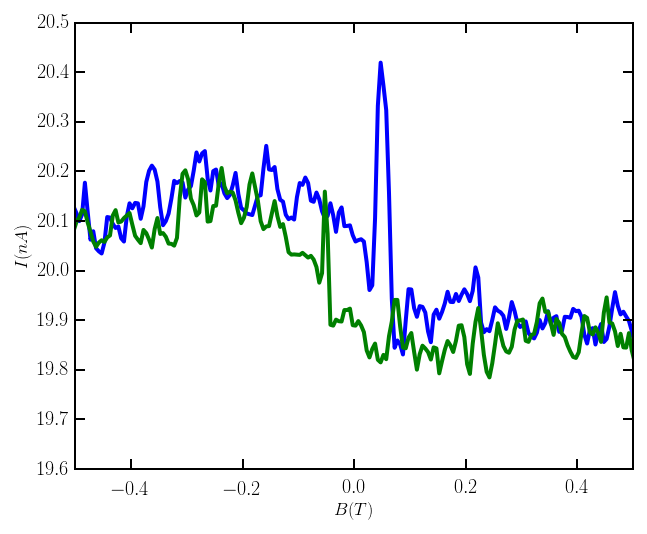

In [75]:
f = os.path.join(cold_dir, 'BI_17-19_13_i.bin')
bias, gate = get_bias_gate(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df = pd.rolling_mean(df, 2)
ind = lvdt.split_sweeps(df, 'Field')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df['Field'][0:601], df['Iavg'][0:601]*1e9, label='Up')
ax.plot(df['Field'][601:1202], df['Iavg'][601:1202]*1e9, label='Down')
ax.set_xlim(-0.5, 0.5)
ax.set_xlabel(r'$B (T)$')
ax.set_ylabel(r'$I (nA)$')

fig.savefig(os.path.join(fig_dir, 'scf72_17-19_bsweep_i_4K.pdf'))

# SCF75

#### 4K Data

In [78]:
cold_dir = '/Volumes/JUPITER/Data/SCF75/4K/'
fig_dir = '/Users/nik/Dropbox/Repos/thesis/figures/fmdots/'

In [79]:
def get_bias(header):
    bias = 0.0
    gate = 0.0
    for i,line in enumerate(header):
        if line[0] == 'Bias Output Options':
            bias = float(header[i+5][1])
#         if line[0] == 'Gate Output Options':
#             gate = float(header[i+5][1])
    return bias

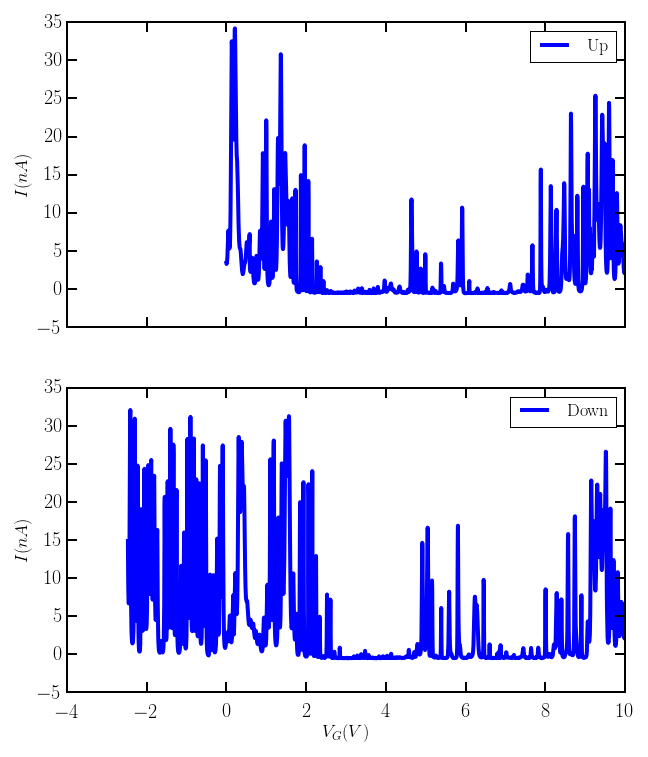

In [88]:
filelist = ['gate-swp_15-16_13_a', 'gate-swp_15-16_13_b', 'gate-swp_15-16_13_d', 
            'gate-swp_15-16_13_e', 'gate-swp_15-16_13_f', 'gate-swp_15-16_13_g',
            'gate-swp_21-23_13_a']


f = os.path.join(cold_dir, 'gate-swp_15-16_13_a.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
# print lvdt.split_sweeps(df, 'Gate')

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df['Gate'][0:2001], df['Iavg'][0:2001]*1e9, label='Up')
ax2.plot(df['Gate'][2001:], df['Iavg'][2001:]*1e9, label='Down')
ax2.set_xlabel(r'$V_G (V)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf75_15-16_gateswp_a_4K.pdf'))

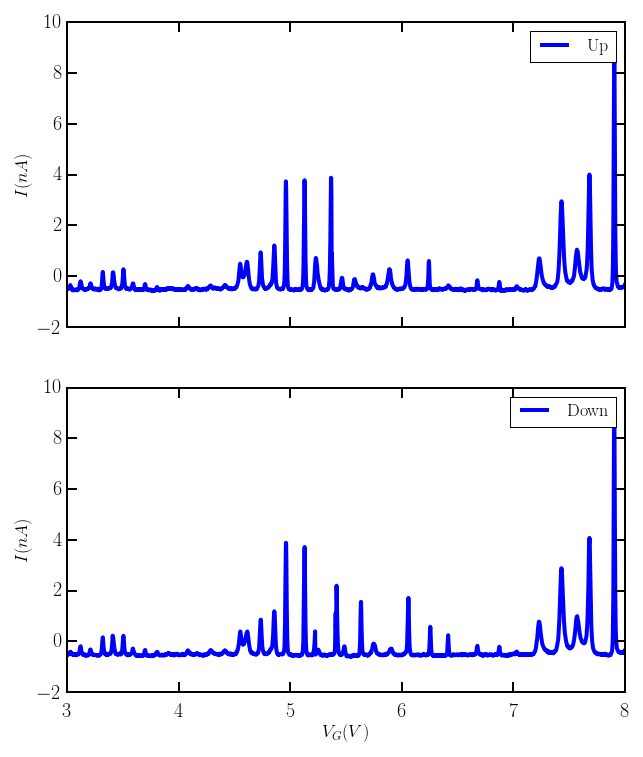

In [91]:
f = os.path.join(cold_dir, 'gate-swp_15-16_13_b.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
# print lvdt.split_sweeps(df, 'Gate')
# plt.plot(df['Gate'])

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df['Gate'][0:2501], df['Iavg'][0:2501]*1e9, label='Up')
ax2.plot(df['Gate'][2501:], df['Iavg'][2501:]*1e9, label='Down')
ax2.set_xlabel(r'$V_G (V)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf75_15-16_gateswp_b_4K.pdf'))

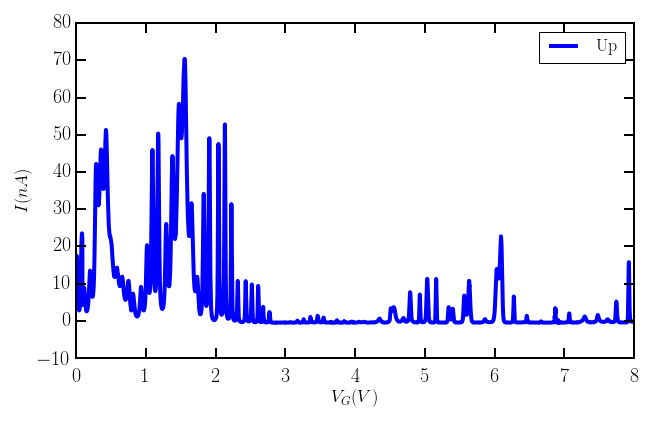

In [95]:
f = os.path.join(cold_dir, 'gate-swp_15-16_13_d.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
# print lvdt.split_sweeps(df, 'Gate')
# plt.plot(df['Gate'])

fig, ax1 = plt.subplots(1,1, figsize = (10, 6), sharex = True)
ax1.plot(df['Gate'][0:4000], df['Iavg'][0:4000]*1e9, label='Up')
ax1.set_xlabel(r'$V_G (V)$')
ax1.set_ylabel(r'$I (nA)$')
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'scf75_15-16_gateswp_d_4K.pdf'))

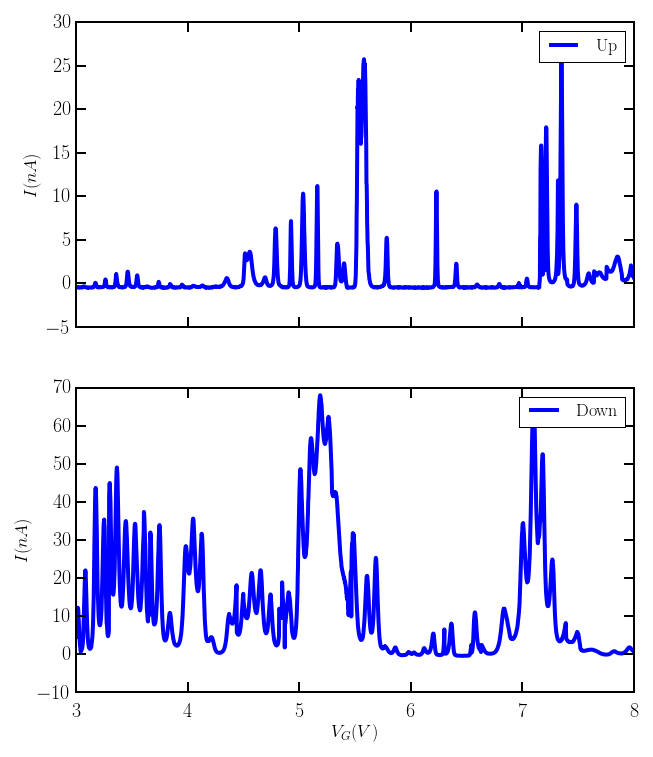

In [97]:
f = os.path.join(cold_dir, 'gate-swp_15-16_13_e.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
# print lvdt.split_sweeps(df, 'Gate')
# plt.plot(df['Gate'])

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df['Gate'][0:2501], df['Iavg'][0:2501]*1e9, label='Up')
ax2.plot(df['Gate'][2501:], df['Iavg'][2501:]*1e9, label='Down')
ax2.set_xlabel(r'$V_G (V)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf75_15-16_gateswp_e_4K.pdf'))

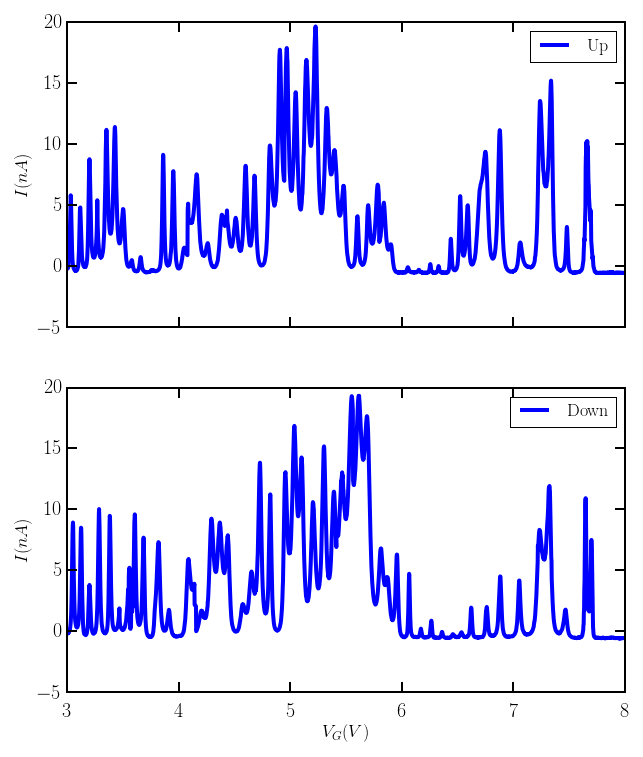

In [99]:
f = os.path.join(cold_dir, 'gate-swp_15-16_13_f.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
# print lvdt.split_sweeps(df, 'Gate')
# plt.plot(df['Gate'])

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df['Gate'][0:2501], df['Iavg'][0:2501]*1e9, label='Up')
ax2.plot(df['Gate'][2501:], df['Iavg'][2501:]*1e9, label='Down')
ax2.set_xlabel(r'$V_G (V)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf75_15-16_gateswp_f_4K.pdf'))

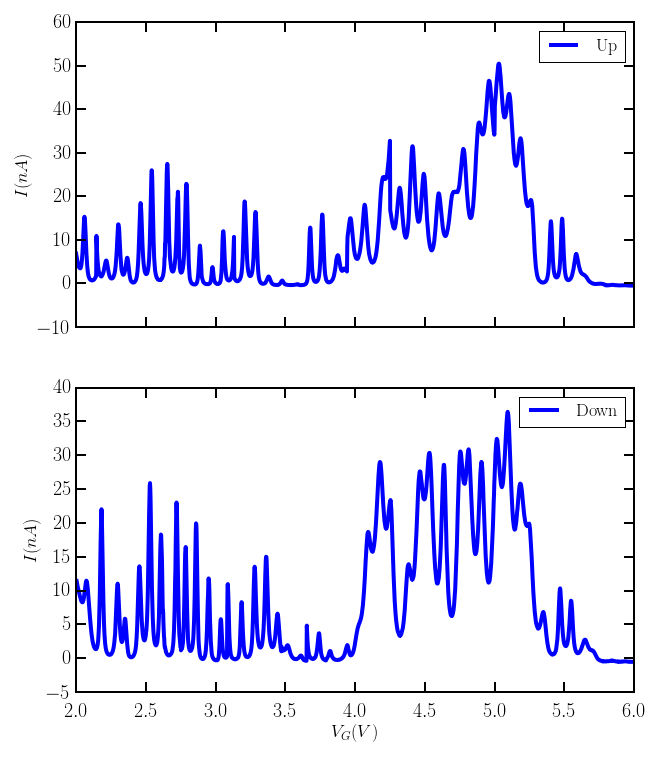

In [101]:
f = os.path.join(cold_dir, 'gate-swp_15-16_13_g.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
# print lvdt.split_sweeps(df, 'Gate')
# plt.plot(df['Gate'])

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df['Gate'][0:2001], df['Iavg'][0:2001]*1e9, label='Up')
ax2.plot(df['Gate'][2001:4000], df['Iavg'][2001:4000]*1e9, label='Down')
ax2.set_xlabel(r'$V_G (V)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf75_15-16_gateswp_g_4K.pdf'))

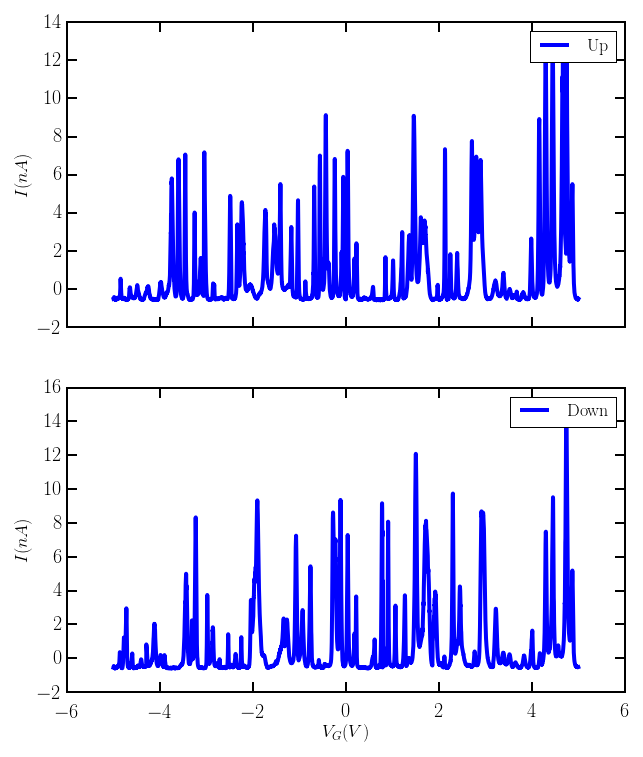

In [108]:
f = os.path.join(cold_dir, 'gate-swp_21-23_13_a.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
df_down = df[df['dir']<0].sort('Gate')
df_up = df[df['dir']>0].sort('Gate')

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up['Gate'], df_up['Iavg']*1e9, label='Up')
ax2.plot(df_down['Gate'], df_down['Iavg']*1e9, label='Down')
ax2.set_xlabel(r'$V_G (V)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf75_21-23_gateswp_a_4K.pdf'))

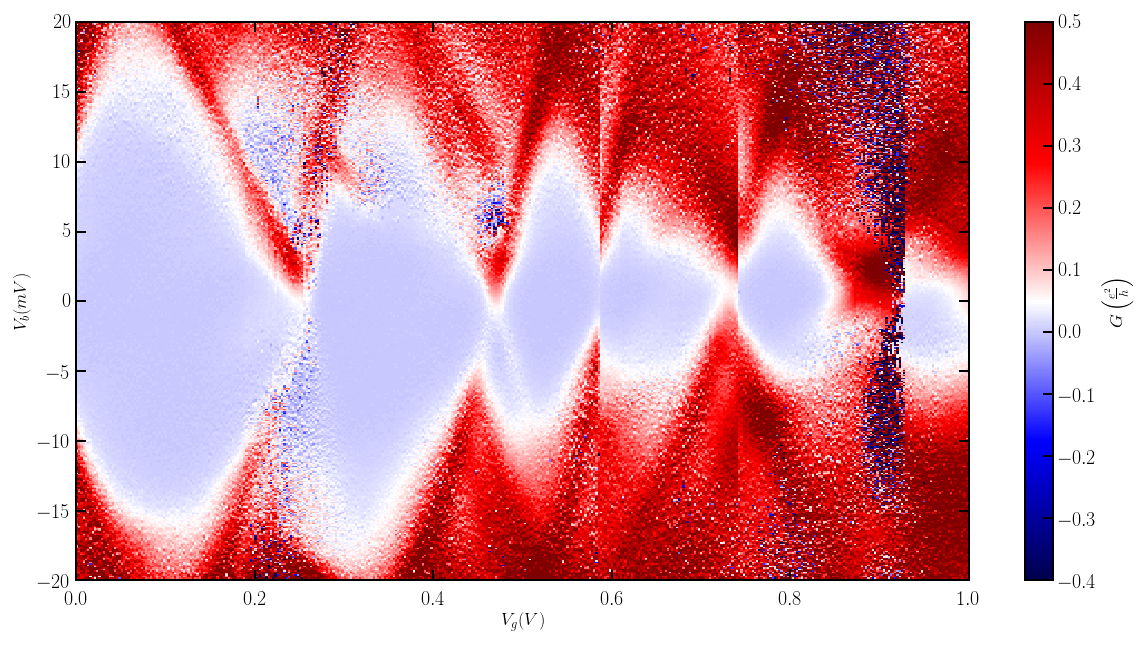

In [113]:
# filelist = [
# 'VI-gate_21-23_13_a.bin',
# 'VI-gate_15-16_13_b.bin', 
# 'VI-gate_21-23_13_b_n1T.bin', 
# 'VI-gate_21-23_13_b_p1T.bin', 
# 'VI-gate_15-16_13_e.bin', 
# 'VI-gate_15-16_13_f.bin']

f = os.path.join(cold_dir,'VI-gate_21-23_13_a.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 100e-6)/3.875e-5
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.4, vmax=0.5, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf75_21-123_vigate_a_4K.pdf'))

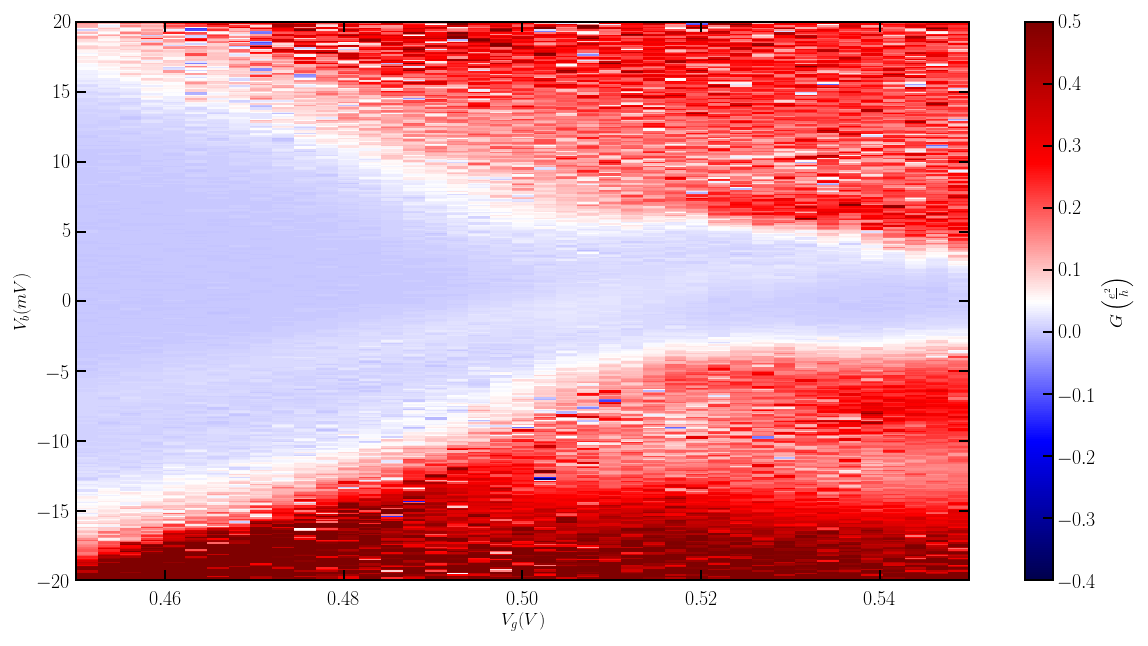

In [117]:
f = os.path.join(cold_dir,'VI-gate_21-23_13_b_n1T.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 100e-6)/3.875e-5
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.4, vmax=0.5, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf75_21-23_vigate_bn1T_4K.pdf'))

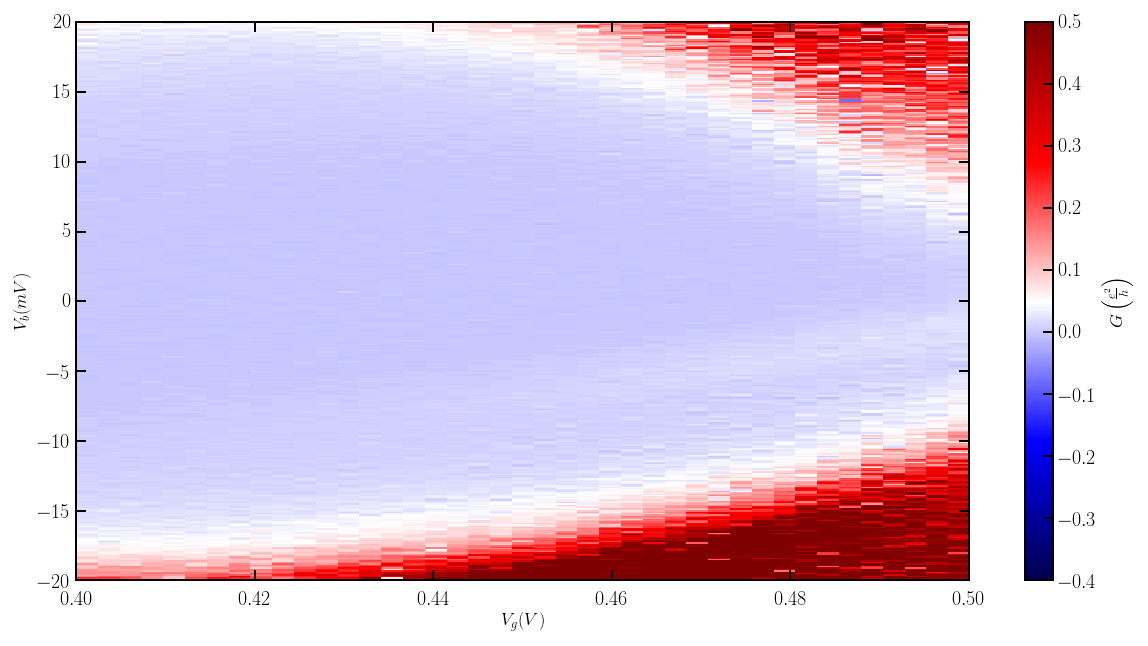

In [120]:
f = os.path.join(cold_dir,'VI-gate_21-23_13_b_p1T.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 100e-6)/3.875e-5
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.4, vmax=0.5, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf75_21-23_vigate_bp1T_4K.pdf'))

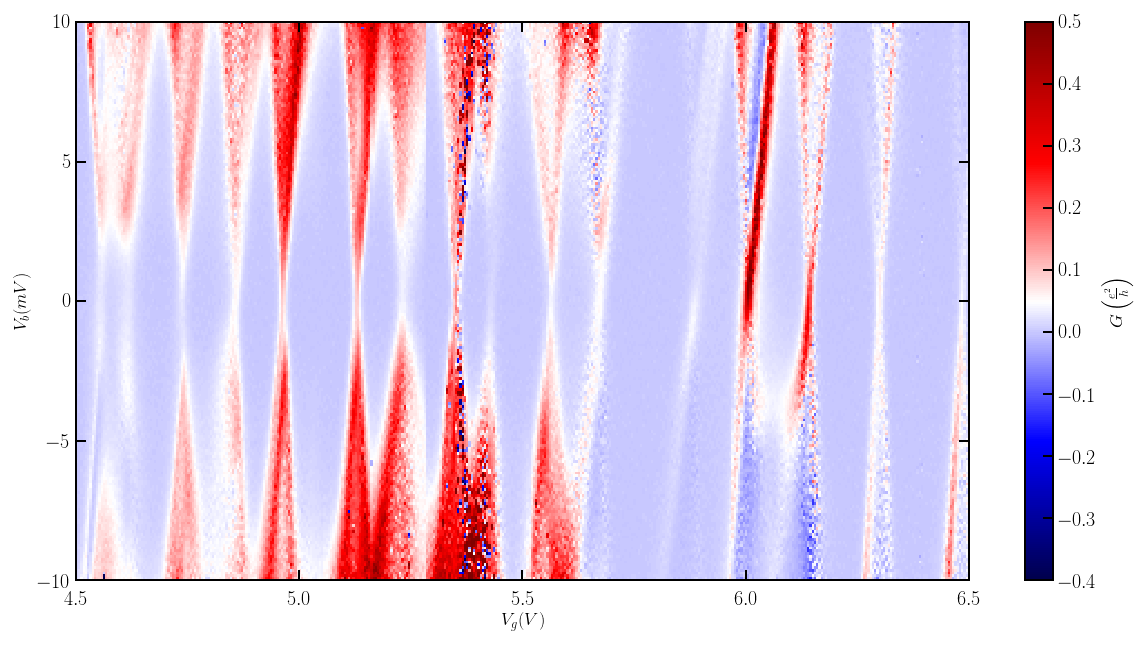

In [123]:
f = os.path.join(cold_dir,'VI-gate_15-16_13_b.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 100e-6)/3.875e-5
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.4, vmax=0.5, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf75_15-16_vigate_b_4K.pdf'))

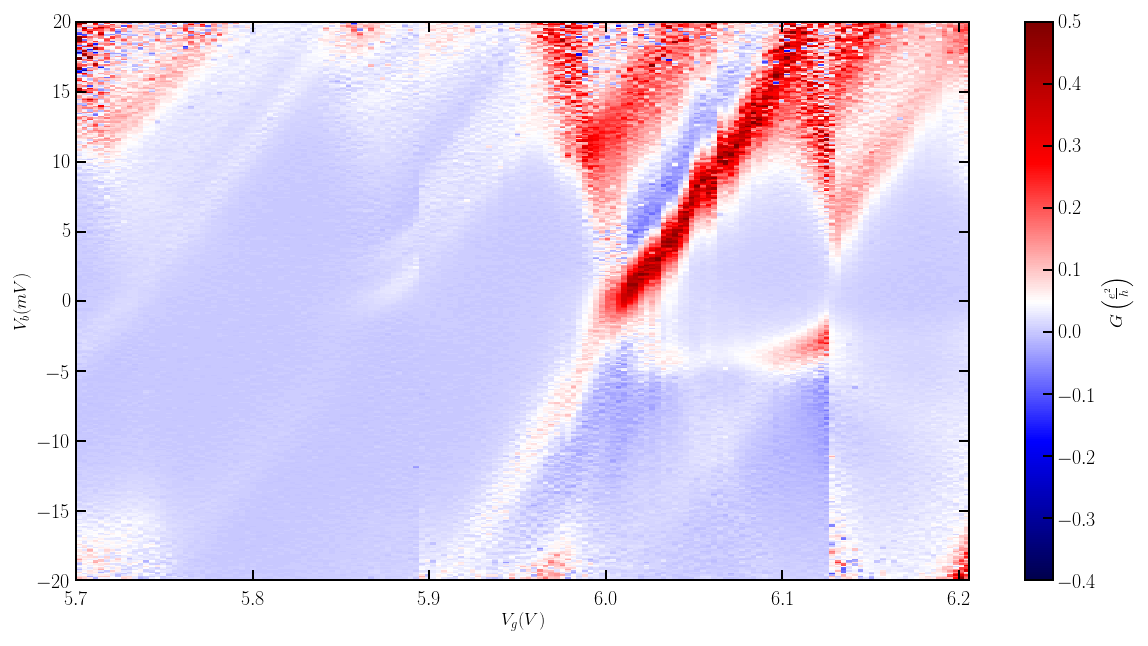

In [126]:
f = os.path.join(cold_dir,'VI-gate_15-16_13_e.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 100e-6)/3.875e-5
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.4, vmax=0.5, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf75_15-16_vigate_e_4K.pdf'))

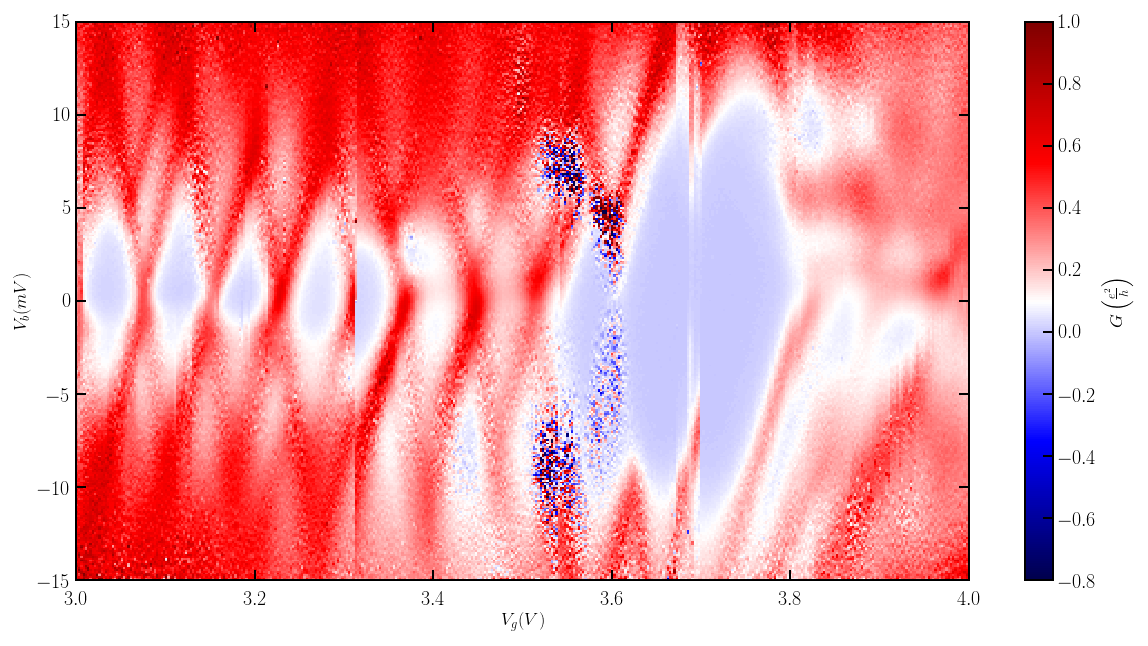

In [132]:
f = os.path.join(cold_dir,'VI-gate_15-16_13_f.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 100e-6)/3.875e-5
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.8, vmax=1.0, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf75_15-16_vigate_f_4K.pdf'))

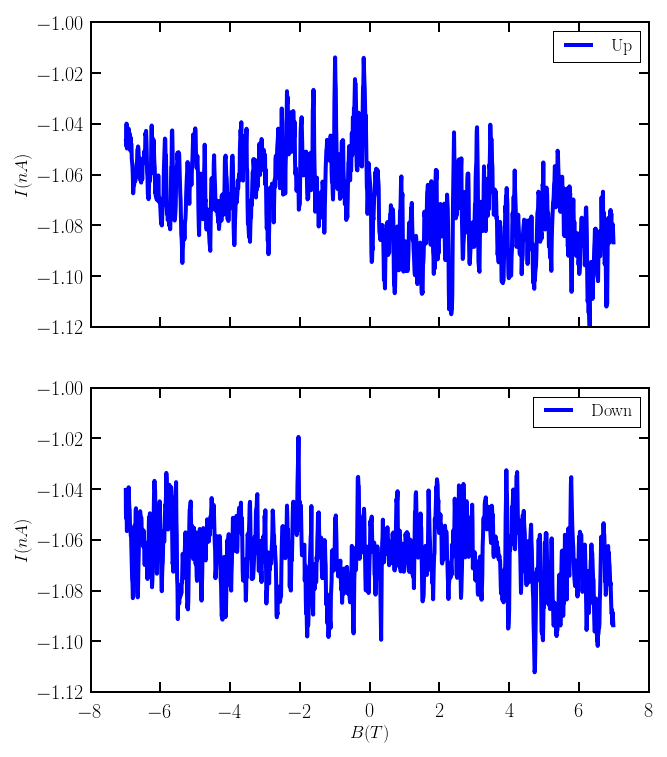

In [145]:
# filelist = [
# 'Bswp_21-23_13_b.bin',
# 'Bswp_21-23_13_d.bin',
# 'Bswp_21-23_13_g.bin', 
# 'Bswp_15-16_13_b.bin'] 

f = os.path.join(cold_dir, 'Bswp_21-23_13_b.bin')
bias, gate = get_bias_gate(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df = pd.rolling_mean(df,5)

# print lvdt.split_sweeps(df, 'Field')
# plt.plot(df['Field'])
df['dir'] = (df['Field']-df['Field'].shift()).fillna(0)
df_down = df[df['dir']<0].sort('Field')
df_up = df[df['dir']>0].sort('Field')

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up['Field'], df_up['Iavg']*1e9, label='Up')
ax2.plot(df_down['Field'], df_down['Iavg']*1e9, label='Down')
ax2.set_xlabel(r'$B (T)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf75_21-23_bsweep_b_4K.pdf'))

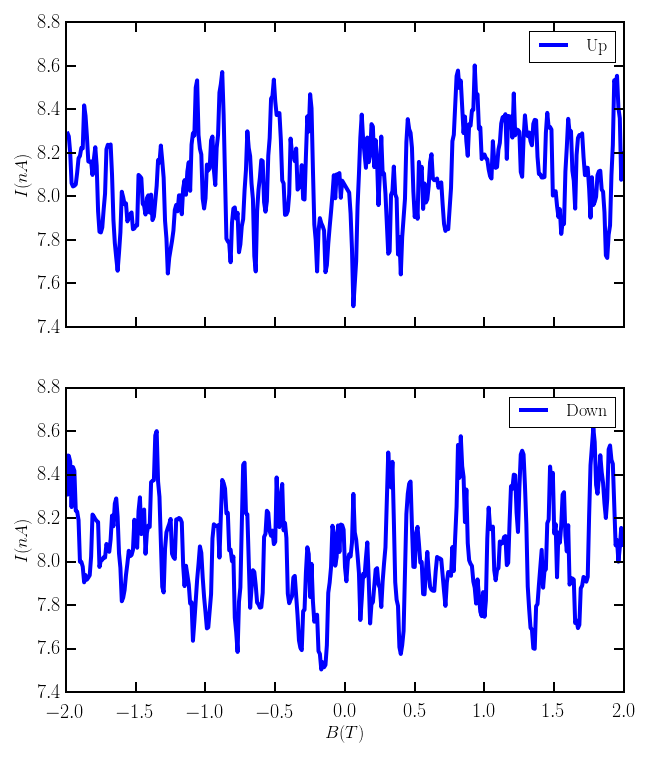

In [146]:
f = os.path.join(cold_dir, 'Bswp_21-23_13_d.bin')
bias, gate = get_bias_gate(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df = pd.rolling_mean(df,5)

# print lvdt.split_sweeps(df, 'Field')
# plt.plot(df['Field'])
df['dir'] = (df['Field']-df['Field'].shift()).fillna(0)
df_down = df[df['dir']<0].sort('Field')
df_up = df[df['dir']>0].sort('Field')

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up['Field'], df_up['Iavg']*1e9, label='Up')
ax2.plot(df_down['Field'], df_down['Iavg']*1e9, label='Down')
ax2.set_xlabel(r'$B (T)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf75_21-23_bsweep_d_4K.pdf'))

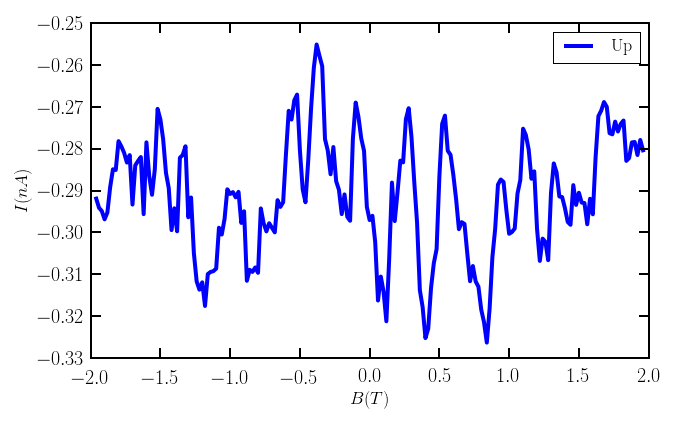

In [152]:
f = os.path.join(cold_dir, 'Bswp_21-23_13_g.bin')
bias, gate = get_bias_gate(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df = pd.rolling_mean(df,5)


fig, ax1 = plt.subplots(1,1, figsize = (10, 6), sharex = True)
ax1.plot(df['Field'], df['Iavg']*1e9, label='Up')
ax1.set_xlabel(r'$B (T)$')
ax1.set_ylabel(r'$I (nA)$')
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'scf75_21-23_bsweep_g_4K.pdf'))

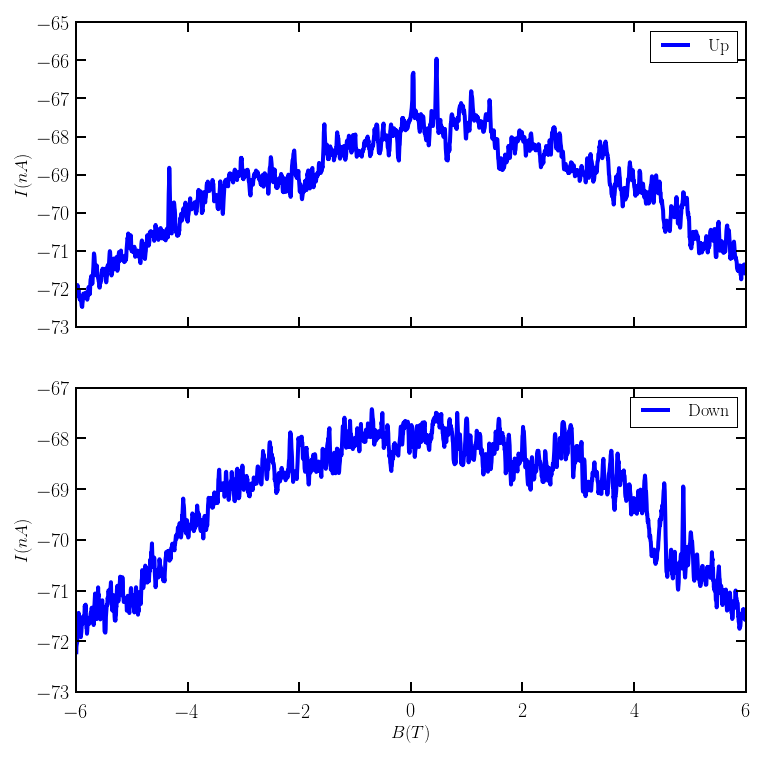

In [155]:
f = os.path.join(cold_dir, 'Bswp_15-16_13_b.bin')
bias, gate = get_bias_gate(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df = pd.rolling_mean(df,5)

# print lvdt.split_sweeps(df, 'Field')
# plt.plot(df['Field'])
df['dir'] = (df['Field']-df['Field'].shift()).fillna(0)
df_down = df[df['dir']<0].sort('Field')
df_up = df[df['dir']>0].sort('Field')

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (12, 12), sharex = True)
ax1.plot(df_up['Field'], df_up['Iavg']*1e9, label='Up')
ax2.plot(df_down['Field'], df_down['Iavg']*1e9, label='Down')
ax2.set_xlabel(r'$B (T)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf75_15-16_bsweep_b_4K.pdf'))

In [156]:
def get_gate(header):
    bias = 0.0
    gate = 0.0
    for i,line in enumerate(header):
#         if line[0] == 'Bias Output Options':
#             bias = float(header[i+5][1])
        if line[0] == 'Gate Output Options':
            gate = float(header[i+5][1])
    return gate

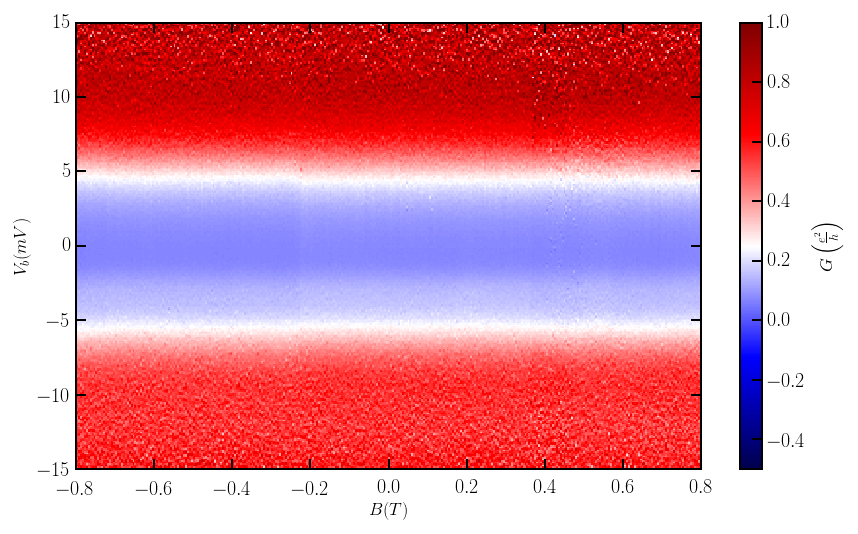

In [165]:
f = os.path.join(cold_dir, 'VI-Bswp_15-16_13_b.bin') # only good one
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000

cond = get_dIdV(df, 100e-6)/3.875e-5
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.5, vmax = 1.0, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$B (T)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf75_15-16_bisweep_b_4K.pdf'))

# SCF96

In [166]:
cold_dir = '/Volumes/JUPITER/Data/SCF96/q1/'
fig_dir = '/Users/nik/Dropbox/Repos/thesis/figures/fmdots/'

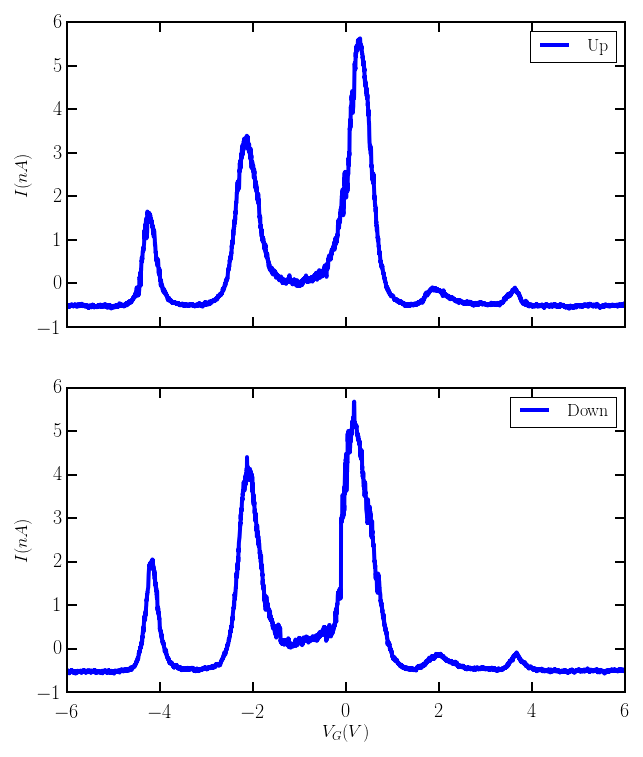

In [168]:
# filelist = ['gate-i_9-12_23_a.bin', 'gate-i_9-12_23_b.bin', 'gate-i_9-12_23_e.bin']

f = os.path.join(cold_dir, 'gate-i_9-12_23_a.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
df_down = df[df['dir']<0].sort('Gate')
df_up = df[df['dir']>0].sort('Gate')

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up['Gate'], df_up['Iavg']*1e9, label='Up')
ax2.plot(df_down['Gate'], df_down['Iavg']*1e9, label='Down')
ax2.set_xlabel(r'$V_G (V)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf96_9-12_gateswp_a_4K.pdf'))

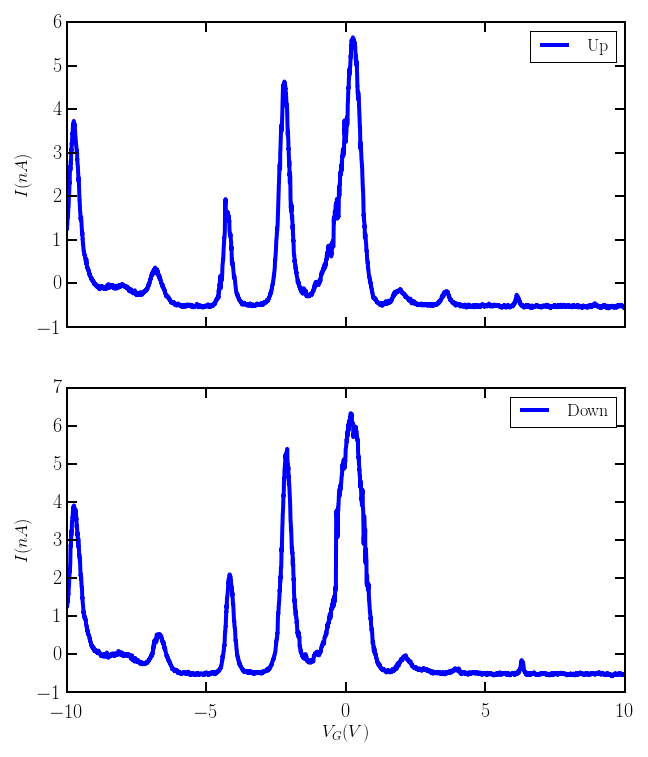

In [170]:
f = os.path.join(cold_dir, 'gate-i_9-12_23_b.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
df_down = df[df['dir']<0].sort('Gate')
df_up = df[df['dir']>0].sort('Gate')

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up['Gate'], df_up['Iavg']*1e9, label='Up')
ax2.plot(df_down['Gate'], df_down['Iavg']*1e9, label='Down')
ax2.set_xlabel(r'$V_G (V)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf96_9-12_gateswp_b_4K.pdf'))

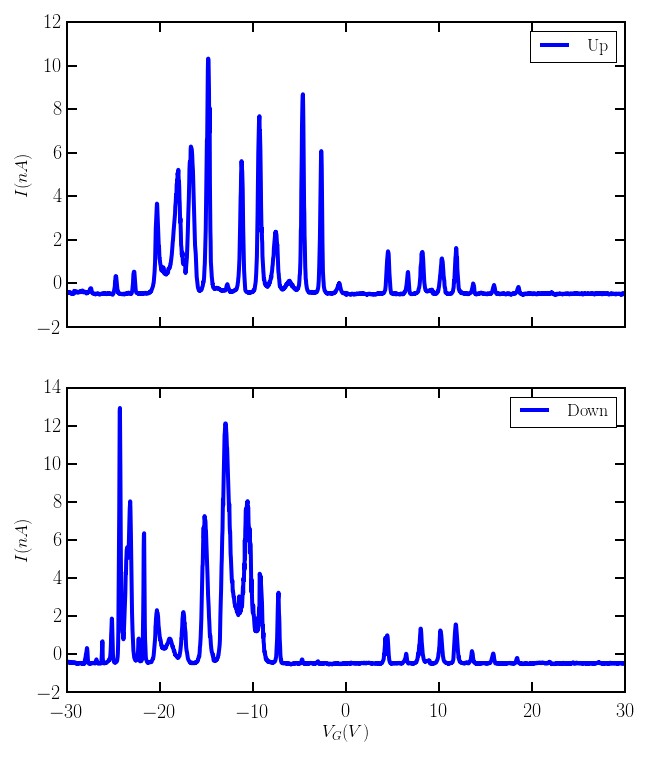

In [171]:
f = os.path.join(cold_dir, 'gate-i_9-12_23_e.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
df_down = df[df['dir']<0].sort('Gate')
df_up = df[df['dir']>0].sort('Gate')

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up['Gate'], df_up['Iavg']*1e9, label='Up')
ax2.plot(df_down['Gate'], df_down['Iavg']*1e9, label='Down')
ax2.set_xlabel(r'$V_G (V)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf96_9-12_gateswp_e_4K.pdf'))

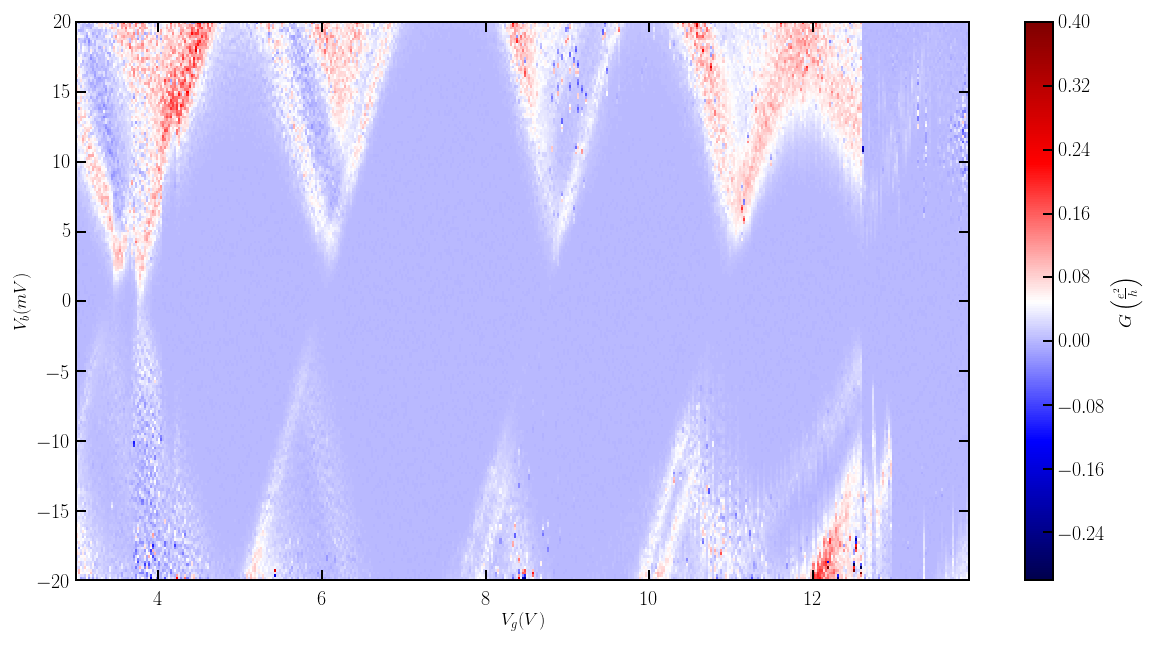

In [175]:
# filelist = ['vi-gate_9-12_23_f.bin', 'vi-gate_9-12_23_f_2T.bin']
f = os.path.join(cold_dir, 'vi-gate_9-12_23_f.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 200e-6)/3.875e-5
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.3, vmax=0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf96_9-12_vigate_f_4K.pdf'))

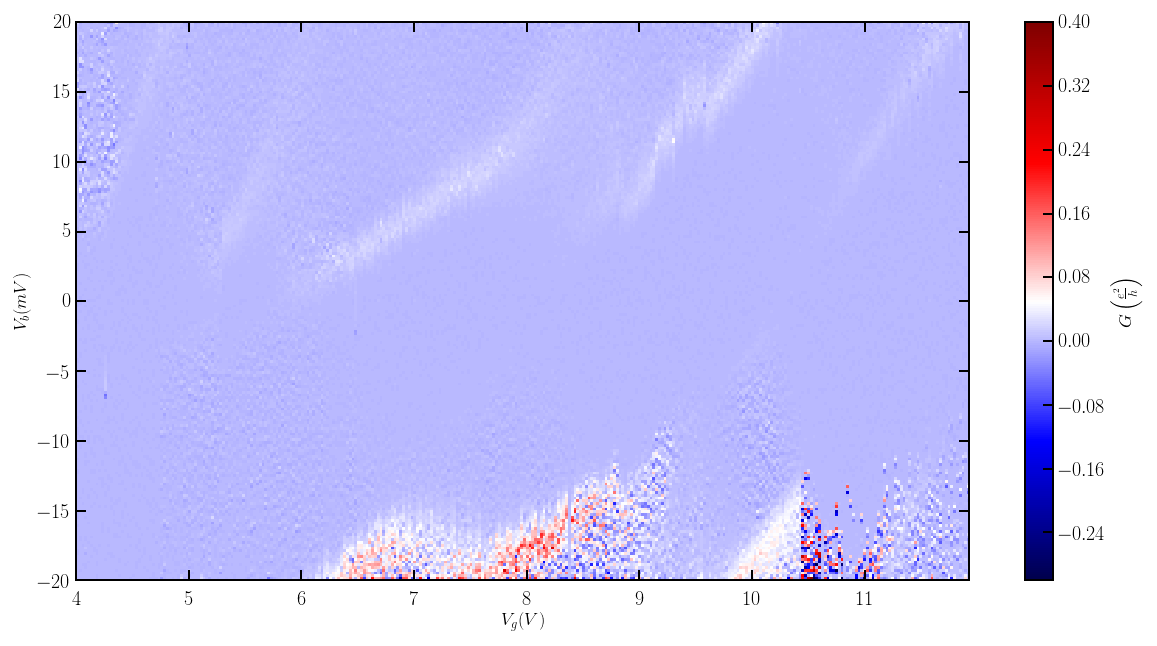

In [176]:
f = os.path.join(cold_dir, 'vi-gate_9-12_23_f_2T.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 200e-6)/3.875e-5
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.3, vmax=0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf96_9-12_vigate_f2T_4K.pdf'))

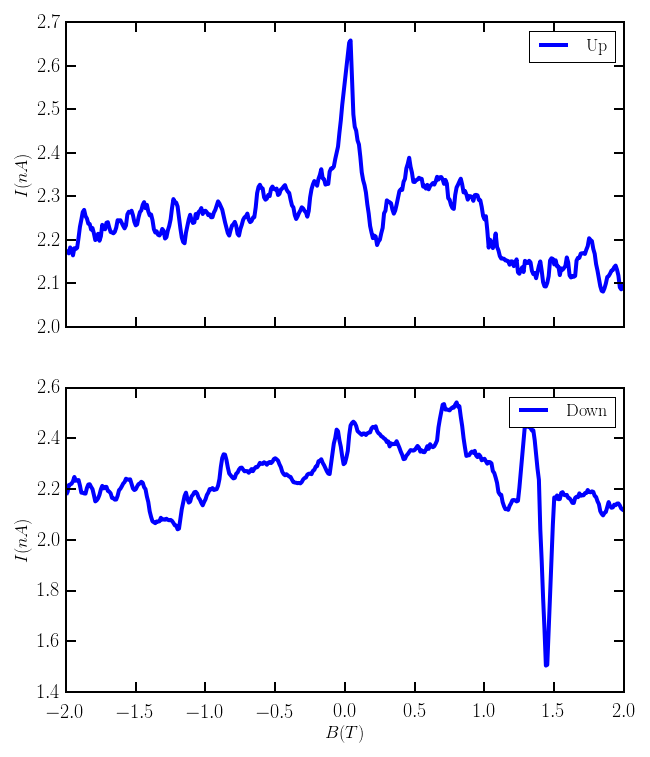

In [181]:
# filelist = ['bi_9-12_23_a.bin', 'bi_9-12_23_c.bin', 'bi_9-12_23_d.bin']

f = os.path.join(cold_dir, 'bi_9-12_23_a.bin')
bias, gate = get_bias_gate(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df = pd.rolling_mean(df,5)

# print lvdt.split_sweeps(df, 'Field')
# plt.plot(df['Field'])
df['dir'] = (df['Field']-df['Field'].shift()).fillna(0)
df_down = df[df['dir']<0].sort('Field')
df_up = df[df['dir']>0].sort('Field')

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up['Field'], df_up['Iavg']*1e9, label='Up')
ax2.plot(df_down['Field'], df_down['Iavg']*1e9, label='Down')
ax2.set_xlabel(r'$B (T)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf96_9-12_bsweep_a_4K.pdf'))

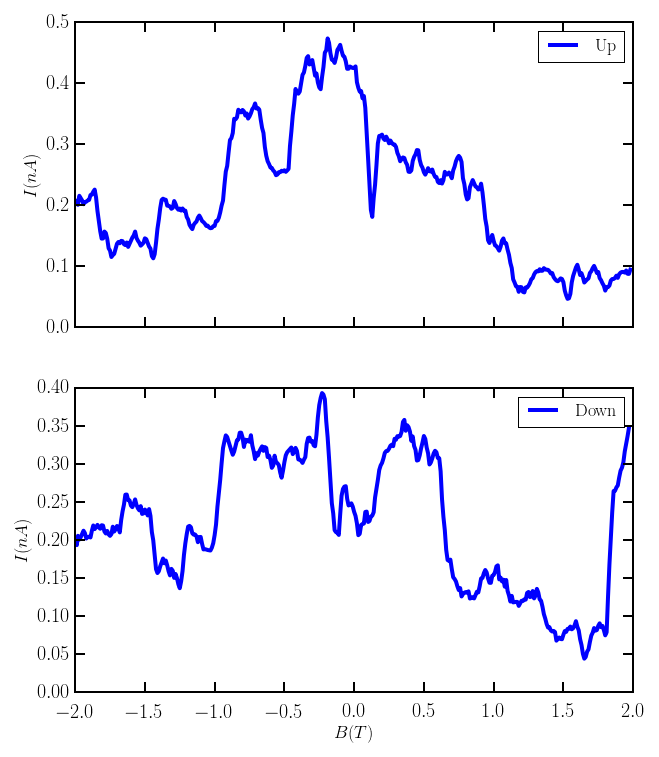

In [182]:
f = os.path.join(cold_dir, 'bi_9-12_23_c.bin')
bias, gate = get_bias_gate(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df = pd.rolling_mean(df,5)

# print lvdt.split_sweeps(df, 'Field')
# plt.plot(df['Field'])
df['dir'] = (df['Field']-df['Field'].shift()).fillna(0)
df_down = df[df['dir']<0].sort('Field')
df_up = df[df['dir']>0].sort('Field')

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up['Field'], df_up['Iavg']*1e9, label='Up')
ax2.plot(df_down['Field'], df_down['Iavg']*1e9, label='Down')
ax2.set_xlabel(r'$B (T)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf96_9-12_bsweep_c_4K.pdf'))

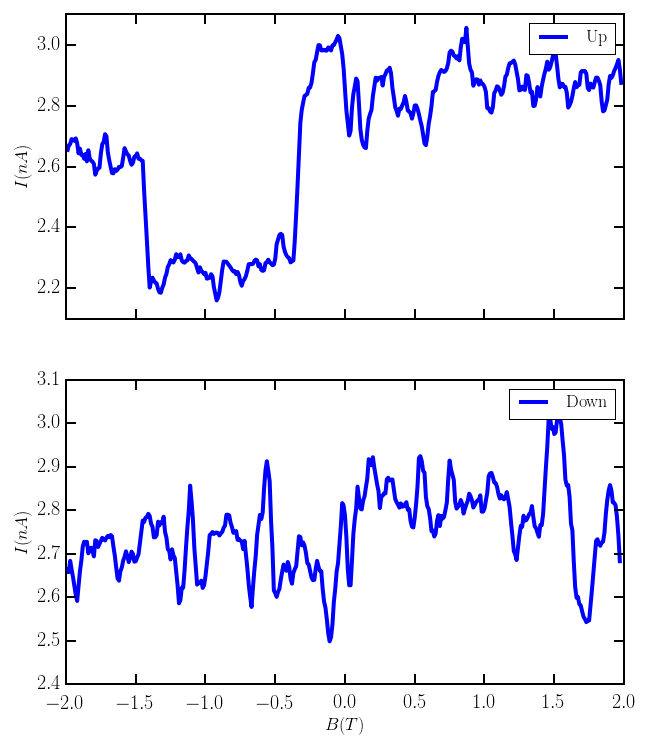

In [183]:
f = os.path.join(cold_dir, 'bi_9-12_23_d.bin')
bias, gate = get_bias_gate(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df = pd.rolling_mean(df,5)

# print lvdt.split_sweeps(df, 'Field')
# plt.plot(df['Field'])
df['dir'] = (df['Field']-df['Field'].shift()).fillna(0)
df_down = df[df['dir']<0].sort('Field')
df_up = df[df['dir']>0].sort('Field')

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up['Field'], df_up['Iavg']*1e9, label='Up')
ax2.plot(df_down['Field'], df_down['Iavg']*1e9, label='Down')
ax2.set_xlabel(r'$B (T)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf96_9-12_bsweep_d_4K.pdf'))

In [6]:
cold_dir = '/Volumes/JUPITER/Data/SCF96/q3/'
fig_dir = '/Users/nik/Dropbox/Repos/thesis/figures/fmdots/'

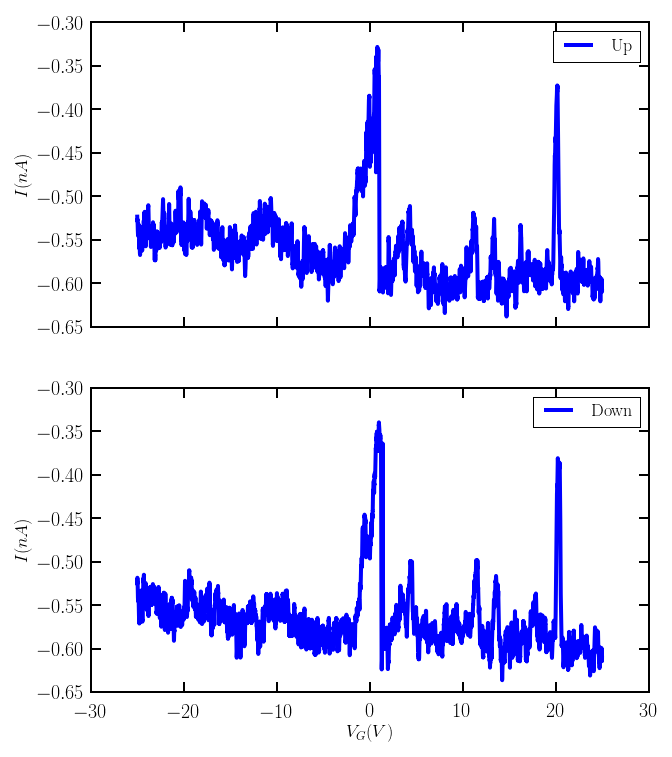

In [187]:
# filelist = ['gate-i_18-20_23_b.bin', 'gate-i_15-16_23_a.bin', 'gate-i_13-18_23_a.bin' , 'gate-i_16-17_23_b.bin']

f = os.path.join(cold_dir, 'gate-i_18-20_23_b.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
df = pd.rolling_mean(df, 10)
df_down = df[df['dir']<0].sort('Gate')
df_up = df[df['dir']>0].sort('Gate')

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up['Gate'], df_up['Iavg']*-1e9, label='Up')
ax2.plot(df_down['Gate'], df_down['Iavg']*-1e9, label='Down')
ax2.set_xlabel(r'$V_G (V)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf96_18-20_gateswp_b_4K.pdf'))

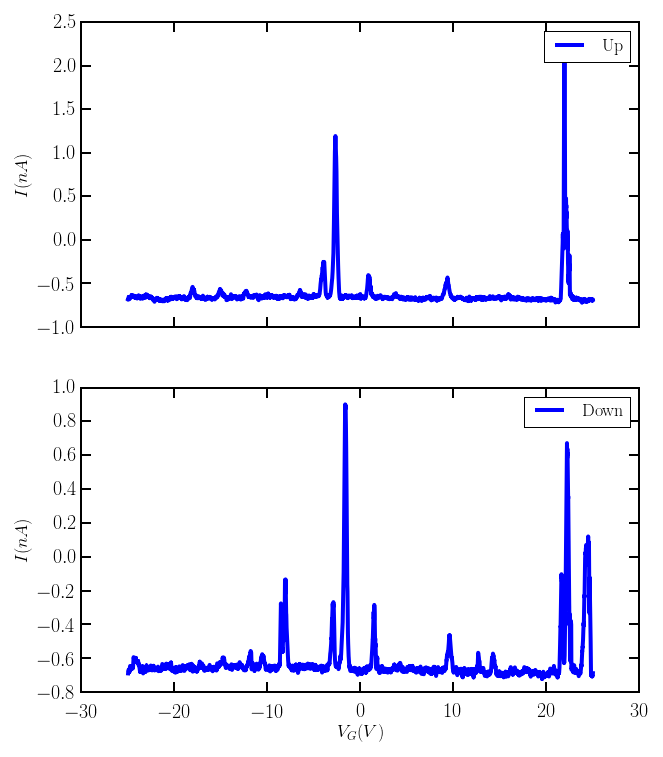

In [189]:
f = os.path.join(cold_dir, 'gate-i_15-16_23_a.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
df = pd.rolling_mean(df, 10)
df_down = df[df['dir']<0].sort('Gate')
df_up = df[df['dir']>0].sort('Gate')

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up['Gate'], df_up['Iavg']*-1e9, label='Up')
ax2.plot(df_down['Gate'], df_down['Iavg']*-1e9, label='Down')
ax2.set_xlabel(r'$V_G (V)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf96_15-16_gateswp_a_4K.pdf'))

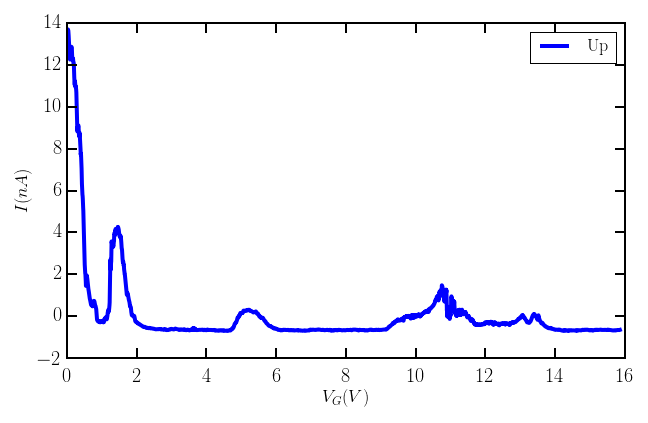

In [193]:
f = os.path.join(cold_dir, 'gate-i_13-18_23_a.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df = pd.rolling_mean(df, 5)

fig, ax1 = plt.subplots(1,1, figsize = (10, 6), sharex = True)
ax1.plot(df['Gate'], df['Iavg']*-1e9, label='Up')
ax1.set_xlabel(r'$V_G (V)$')
ax1.set_ylabel(r'$I (nA)$')
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'scf96_13-18_gateswp_a_4K.pdf'))

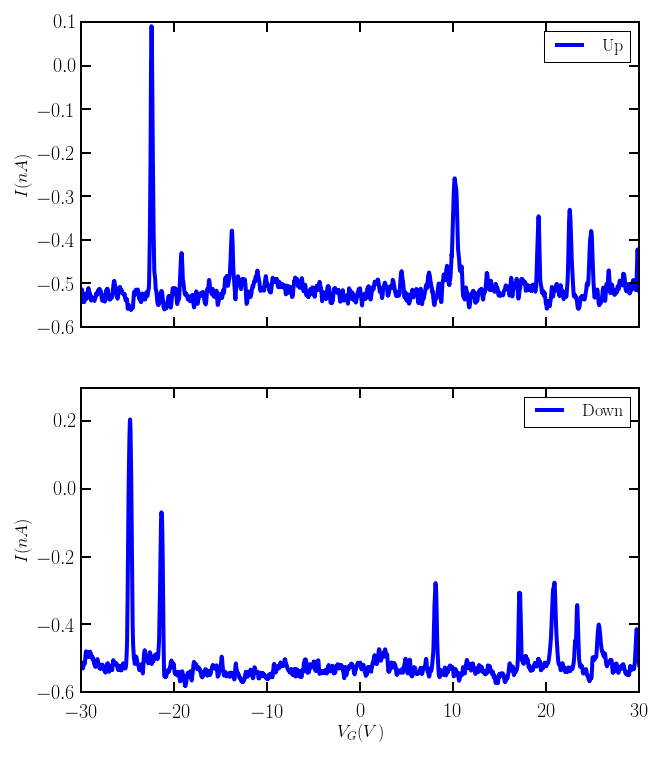

In [197]:
f = os.path.join(cold_dir, 'gate-i_16-17_23_b.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
df = pd.rolling_mean(df, 5)
df_down = df[df['dir']<0].sort('Gate')
df_up = df[df['dir']>0].sort('Gate')

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up['Gate'], df_up['Iavg']*1e9, label='Up')
ax2.plot(df_down['Gate'], df_down['Iavg']*1e9, label='Down')
ax2.set_xlabel(r'$V_G (V)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf96_16-17_gateswp_b_4K.pdf'))

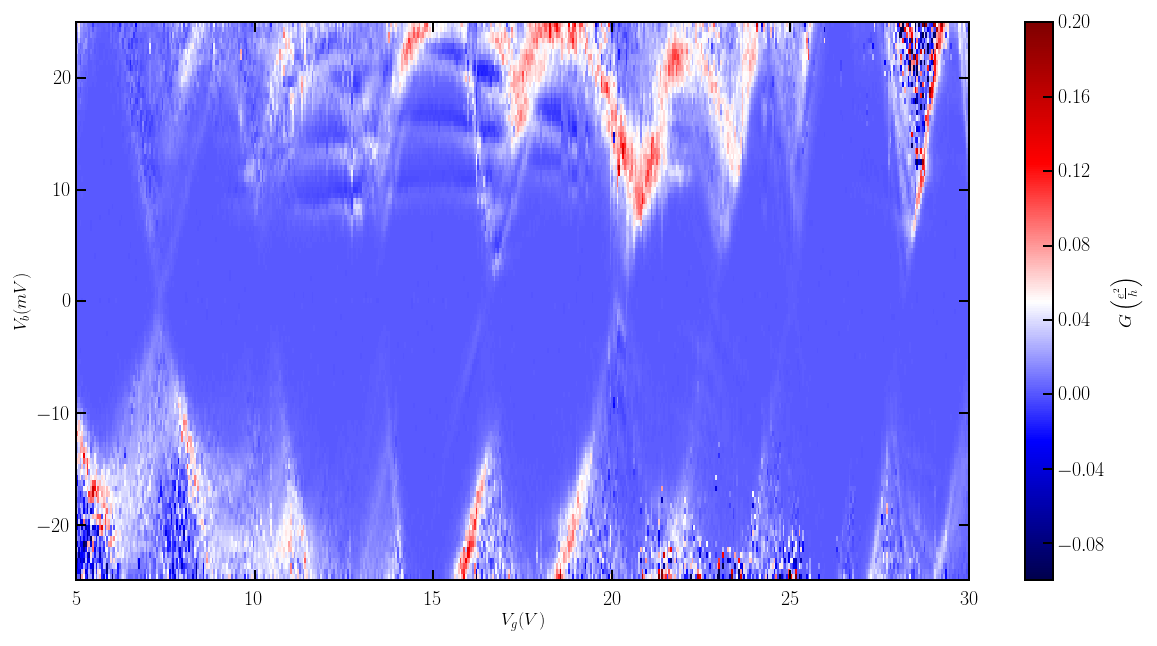

In [201]:
# filelist = ['vi-gate_16-17_23_a.bin', 'vi-gate_16-17_23_a_2T.bin']

f = os.path.join(cold_dir, 'vi-gate_16-17_23_a.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 500e-6)/3.875e-5
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.1, vmax=0.2, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf96_16-17_vigate_a_4K.pdf'))

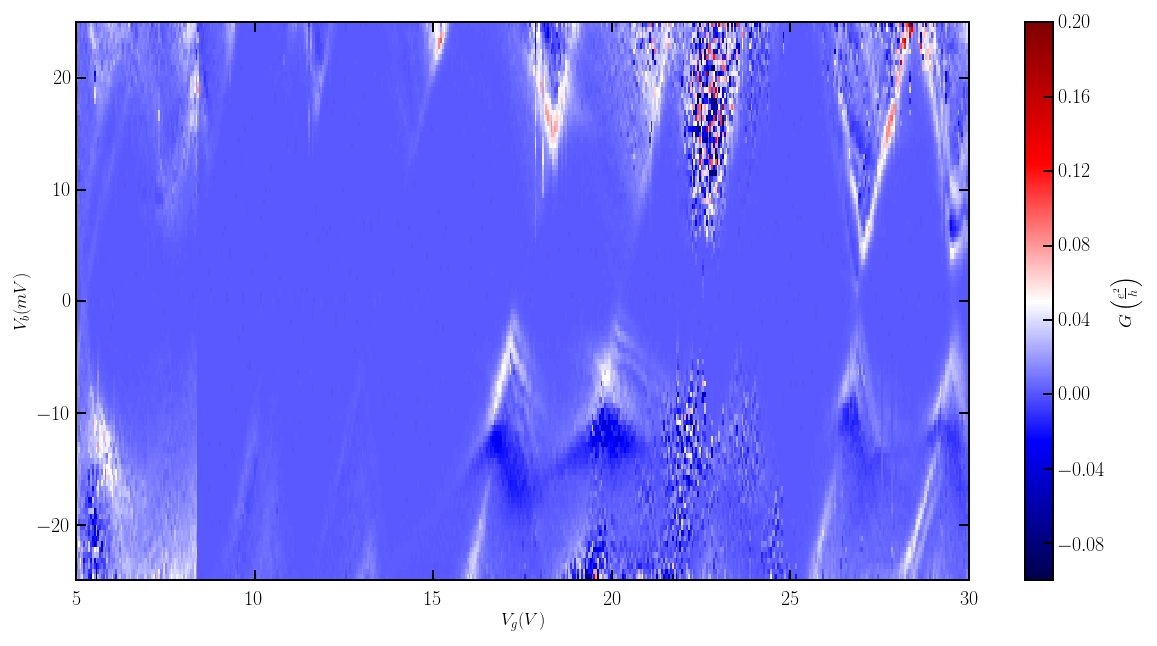

In [202]:
f = os.path.join(cold_dir, 'vi-gate_16-17_23_a_2T.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 500e-6)/3.875e-5
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.1, vmax=0.2, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf96_16-17_vigate_a2T_4K.pdf'))

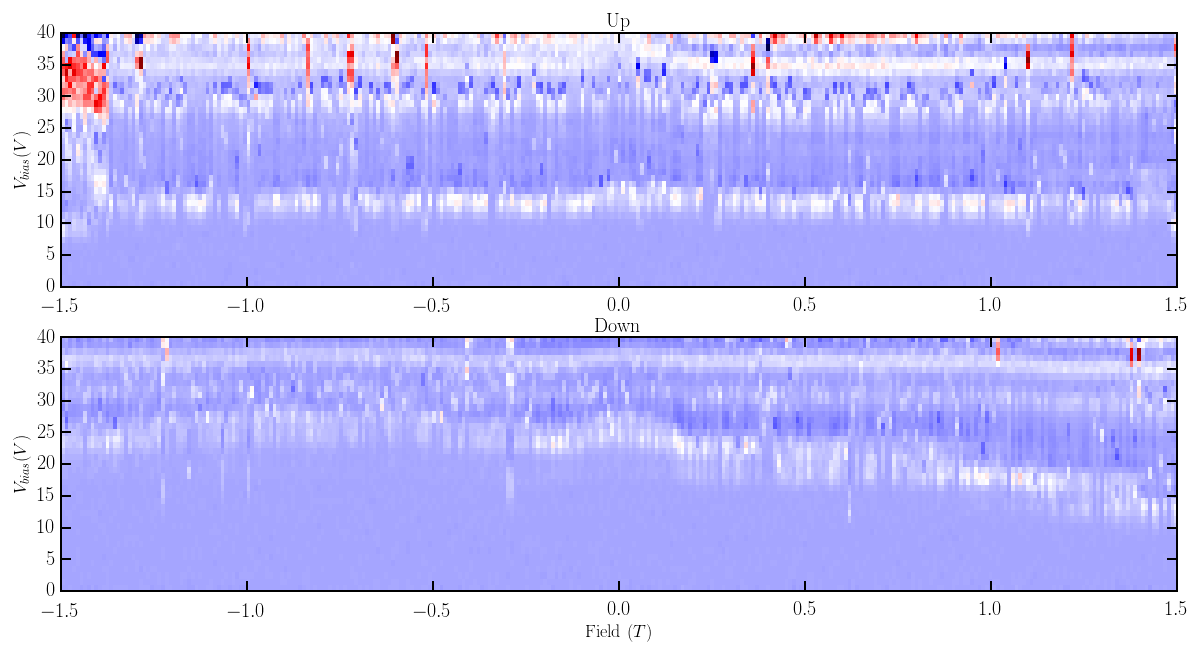

In [7]:
f = os.path.join(cold_dir, 'vi-bswp_16-17_23_c.bin')

df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
df_up = df.iloc[:,0:301]
df_down = df.iloc[:,301:]
df_down = df_down[df_down.columns[::-1]]
cond_up = get_dIdV(df_up, 1e-3)/3.875e-5
cond_down = get_dIdV(df_down, 1e-3)/3.875e-5

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,10))

limits = lvdt.df_extent(cond_up)
ax1.imshow(cond_up, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.04, vmax=0.06, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
limits = lvdt.df_extent(cond_down)
ax2.imshow(cond_down, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.04, vmax=0.06, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax1.set_title('Up')
ax2.set_title('Down')
ax2.set_xlabel('Field $(T)$')
ax1.set_ylabel('$V_{bias} (V)$')
ax2.set_ylabel('$V_{bias} (V)$')

fig.savefig(os.path.join(fig_dir, 'scf96_16-17_bisweep_c_4K.pdf'))

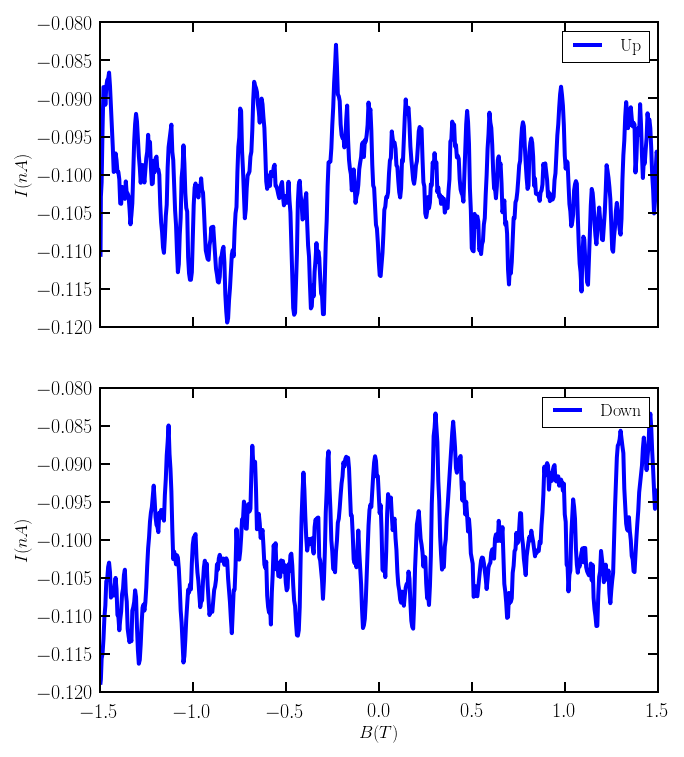

In [225]:
# filelist = ['bi_16-17_23_multiple-runs_b.bin', 'bi_16-17_23_multiple-runs_c.bin', 'bi_16-17_23_multiple-runs_f.bin']

f = os.path.join(cold_dir, 'bi_16-17_23_multiple-runs_b.bin')
bias, gate = get_bias_gate(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df = pd.rolling_mean(df,5)

# print lvdt.split_sweeps(df, 'Field')
# plt.plot(df['Field'])
df['dir'] = (df['Field']-df['Field'].shift()).fillna(0)
df_down = df[df['dir']<0].sort('Field')
df_up = df[df['dir']>0].sort('Field')
df_down = df_down.groupby(df_down['Field']).mean()
df_up = df_up.groupby(df_up['Field']).mean()

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up.index, df_up['Iavg']*1e9, label='Up')
ax2.plot(df_down.index, df_down['Iavg']*1e9, label='Down')
ax2.set_xlabel(r'$B (T)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf96_16-17_bsweep_b_4K.pdf'))

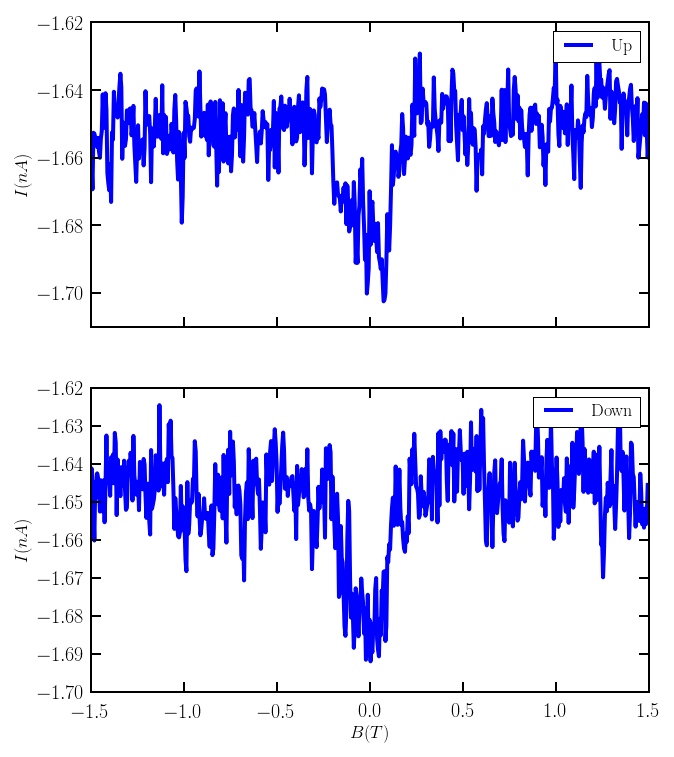

In [228]:
f = os.path.join(cold_dir, 'bi_16-17_23_multiple-runs_c.bin')
bias, gate = get_bias_gate(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
# df = pd.rolling_mean(df,5)

# print lvdt.split_sweeps(df, 'Field')
# plt.plot(df['Field'])
df['dir'] = (df['Field']-df['Field'].shift()).fillna(0)
df_down = df[df['dir']<0].sort('Field')
df_up = df[df['dir']>0].sort('Field')
df_down = df_down.groupby(df_down['Field']).mean()
df_up = df_up.groupby(df_up['Field']).mean()

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up.index, df_up['Iavg']*1e9, label='Up')
ax2.plot(df_down.index, df_down['Iavg']*1e9, label='Down')
ax2.set_xlabel(r'$B (T)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf96_16-17_bsweep_c_4K.pdf'))

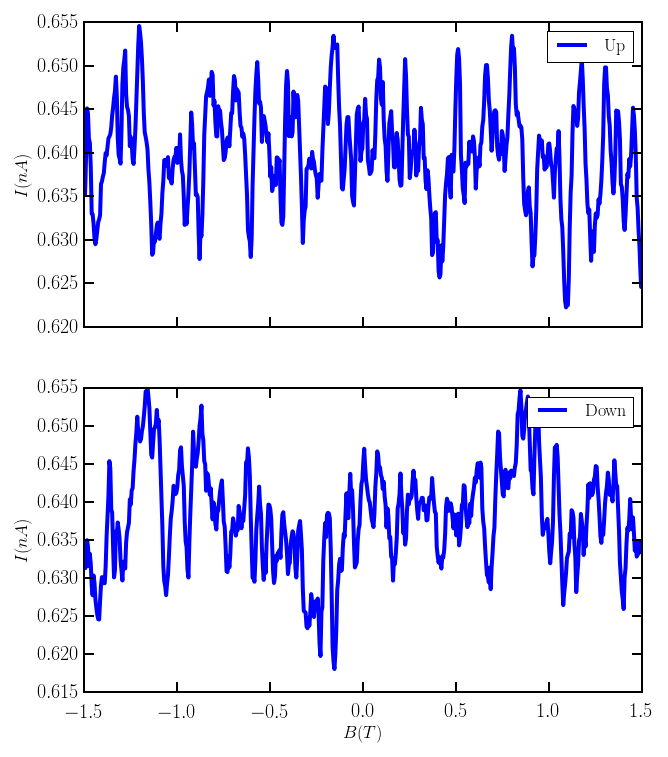

In [230]:
f = os.path.join(cold_dir, 'bi_16-17_23_multiple-runs_f.bin')
bias, gate = get_bias_gate(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df = pd.rolling_mean(df,5)

# print lvdt.split_sweeps(df, 'Field')
# plt.plot(df['Field'])
df['dir'] = (df['Field']-df['Field'].shift()).fillna(0)
df_down = df[df['dir']<0].sort('Field')
df_up = df[df['dir']>0].sort('Field')
df_down = df_down.groupby(df_down['Field']).mean()
df_up = df_up.groupby(df_up['Field']).mean()

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up.index, df_up['Iavg']*1e9, label='Up')
ax2.plot(df_down.index, df_down['Iavg']*1e9, label='Down')
ax2.set_xlabel(r'$B (T)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf96_16-17_bsweep_f_4K.pdf'))

# SCF98

In [238]:
cold_dir = '/Volumes/JUPITER/Data/SCF98/q2/500mK/'
fig_dir = '/Users/nik/Dropbox/Repos/thesis/figures/fmdots/'

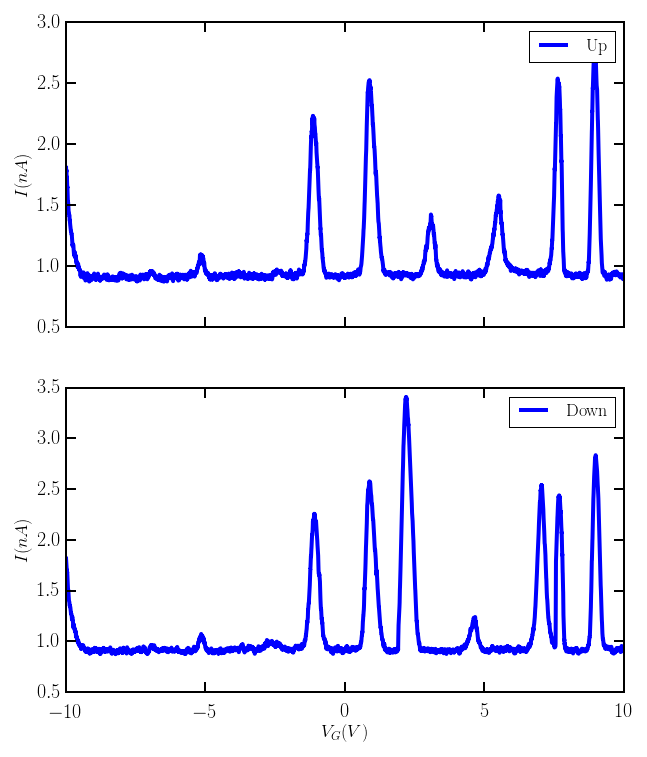

In [234]:
f = os.path.join(cold_dir, 'gate-i_11-12_24_b.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
df = pd.rolling_mean(df, 5)
df_down = df[df['dir']<0].sort('Gate')
df_up = df[df['dir']>0].sort('Gate')

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up['Gate'], df_up['Iavg']*1e9, label='Up')
ax2.plot(df_down['Gate'], df_down['Iavg']*1e9, label='Down')
ax2.set_xlabel(r'$V_G (V)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf98_11-12_gateswp_b_500mK.pdf'))

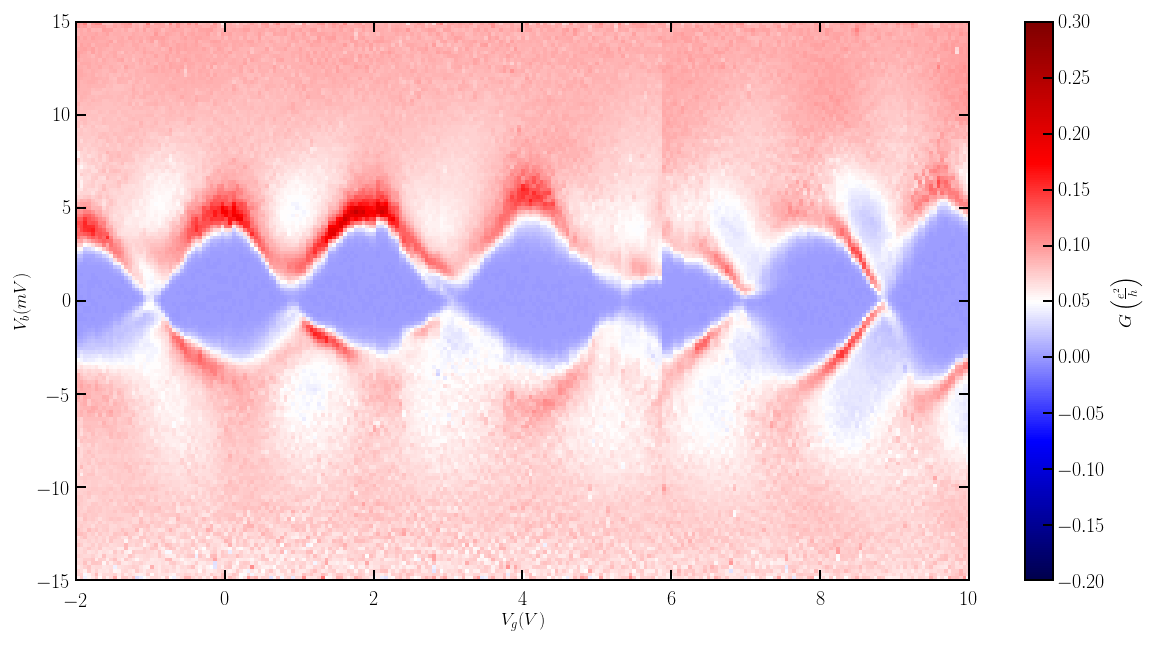

In [243]:
# filelist = ['vi-gate_11-12_23_c.bin', 'vi-gate_11-12_23_e.bin']

f = os.path.join(cold_dir, 'vi-gate_11-12_23_c.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 200e-6)/3.875e-5
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf98_11-12_vigate_c_500mK.pdf'))

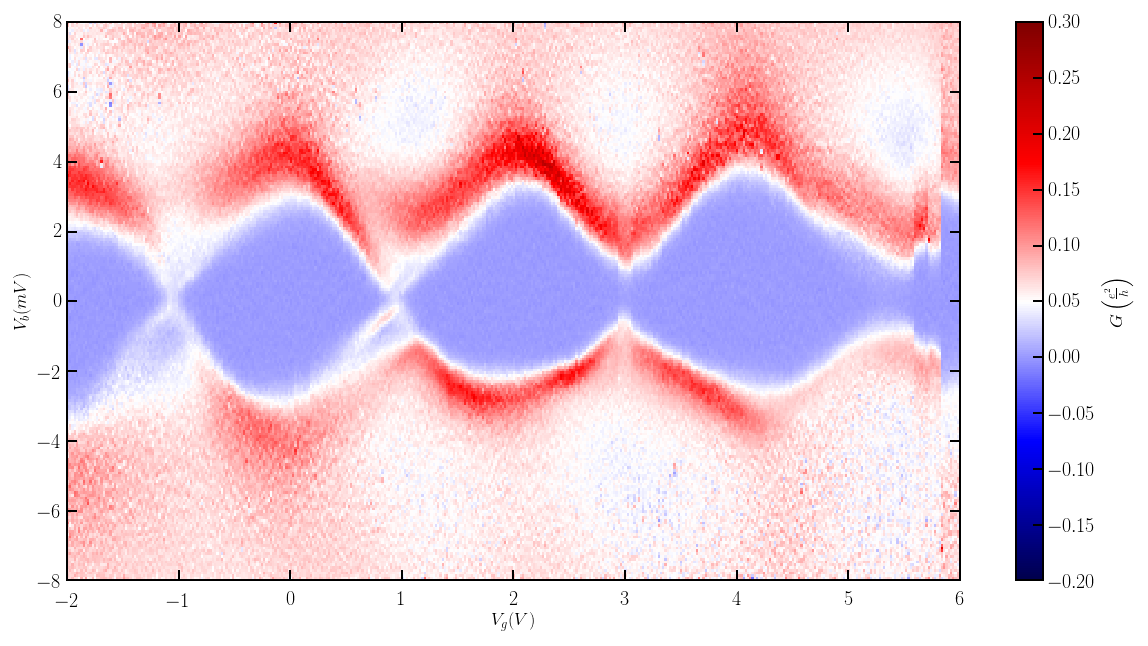

In [245]:
f = os.path.join(cold_dir, 'vi-gate_11-12_23_e.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 80e-6)/3.875e-5
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf98_11-12_vigate_e_500mK.pdf'))

In [246]:
cold_dir = '/Volumes/JUPITER/Data/SCF98/q2/150mK/'
fig_dir = '/Users/nik/Dropbox/Repos/thesis/figures/fmdots/'

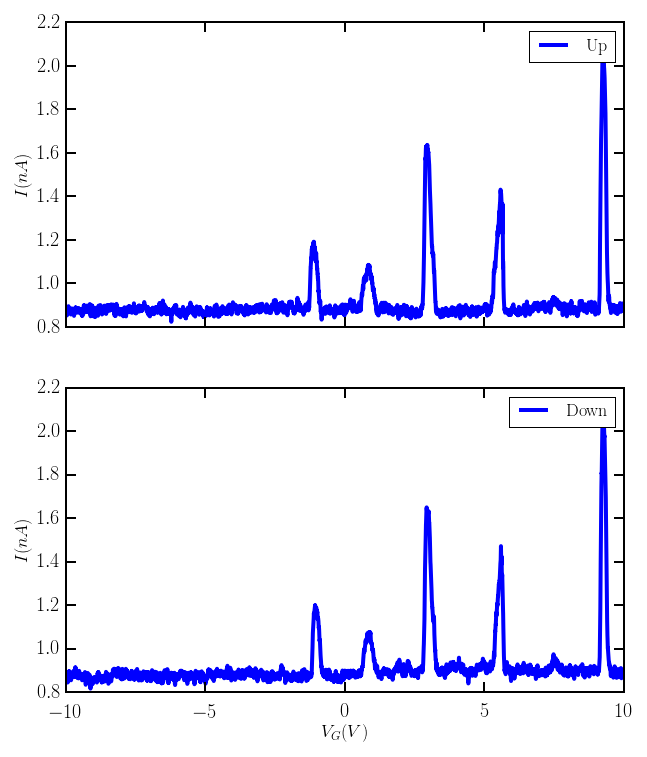

In [247]:
f = os.path.join(cold_dir, 'gate-i_11-12_24_a.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
df = pd.rolling_mean(df, 5)
df_down = df[df['dir']<0].sort('Gate')
df_up = df[df['dir']>0].sort('Gate')

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up['Gate'], df_up['Iavg']*1e9, label='Up')
ax2.plot(df_down['Gate'], df_down['Iavg']*1e9, label='Down')
ax2.set_xlabel(r'$V_G (V)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf98_11-12_gateswp_a_150mK.pdf'))

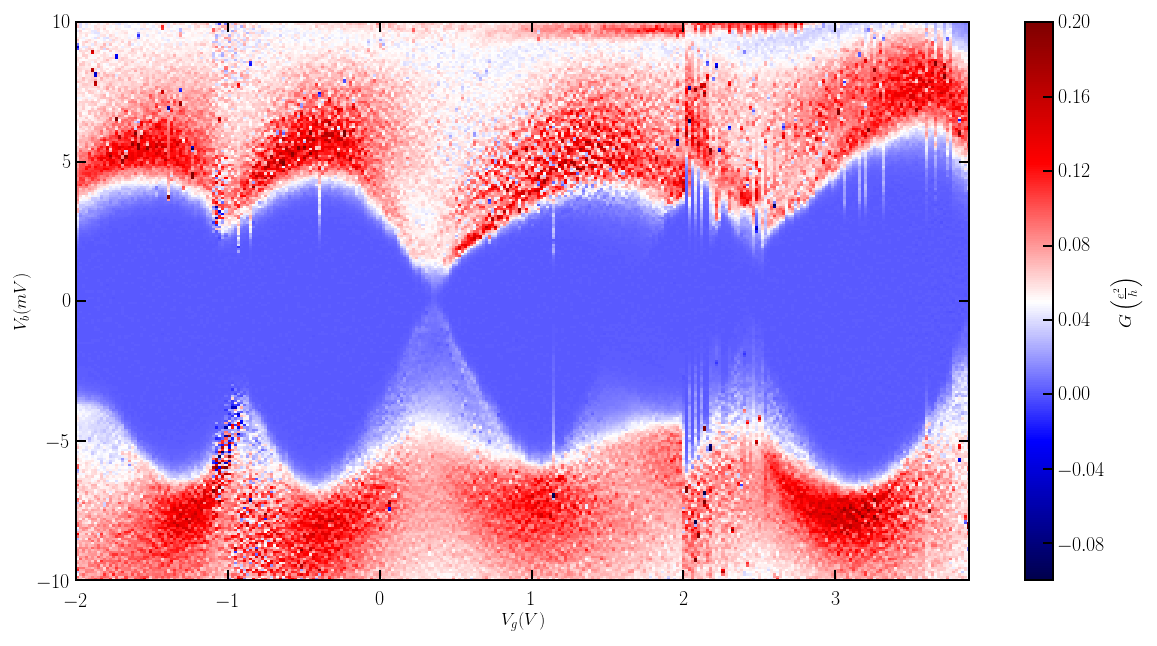

In [253]:
# filelist = ['vi-gate_11-12_23_g.bin', 'vi-gate_11-12_23_i.bin']

f = os.path.join(cold_dir, 'vi-gate_11-12_23_g.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 80e-6)/3.875e-5
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.1, vmax=0.2, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf98_11-12_vigate_g_150mK.pdf'))

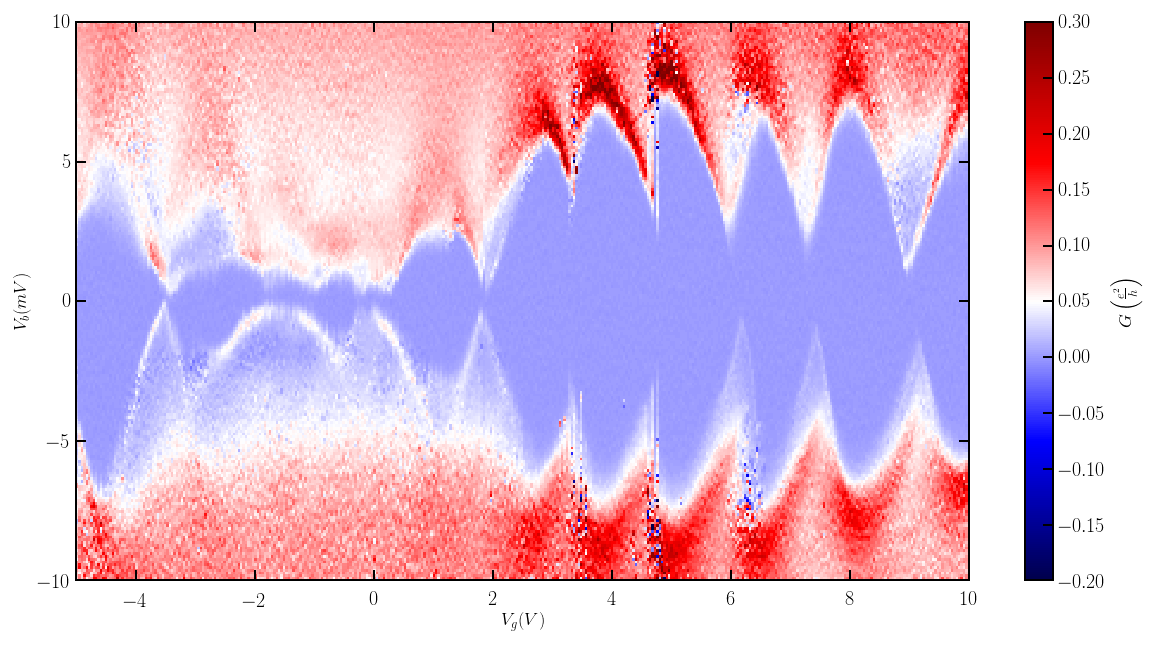

In [254]:
f = os.path.join(cold_dir, 'vi-gate_11-12_23_i.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 100e-6)/3.875e-5
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'scf98_11-12_vigate_i_150mK.pdf'))

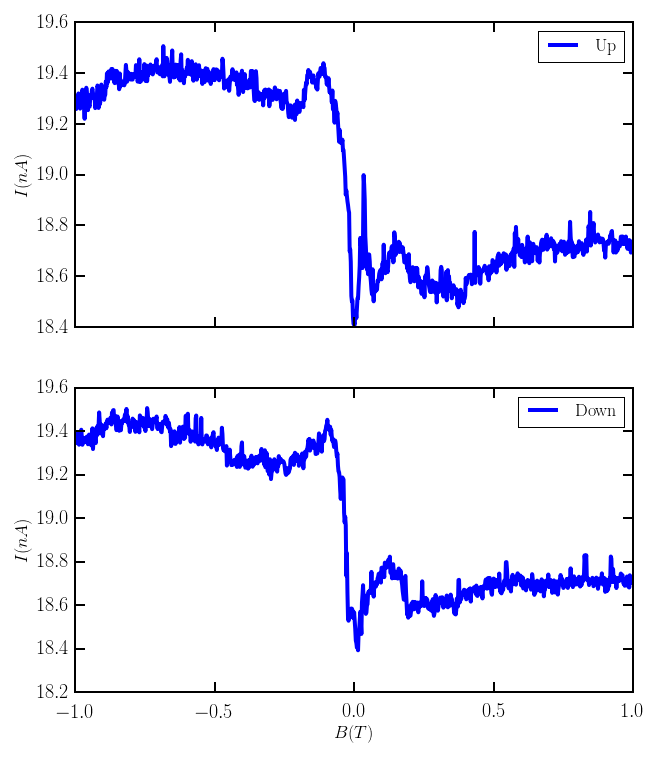

In [258]:
f = os.path.join(cold_dir, 'bi_11-12_23_b.bin')
bias, gate = get_bias_gate(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
# df = pd.rolling_mean(df,5)

# print lvdt.split_sweeps(df, 'Field')
# plt.plot(df['Field'])
df['dir'] = (df['Field']-df['Field'].shift()).fillna(0)
df_down = df[df['dir']<0].sort('Field')
df_up = df[df['dir']>0].sort('Field')
df_down = df_down.groupby(df_down['Field']).mean()
df_up = df_up.groupby(df_up['Field']).mean()

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up.index, df_up['Iavg']*1e9, label='Up')
ax2.plot(df_down.index, df_down['Iavg']*1e9, label='Down')
ax2.set_xlabel(r'$B (T)$')
ax1.set_ylabel(r'$I (nA)$')
ax2.set_ylabel(r'$I (nA)$')
ax1.legend()
ax2.legend()

fig.savefig(os.path.join(fig_dir, 'scf98_11-12_bsweep_b_150mK.pdf'))